# Lending Club Case Study
## by Ankit Kumar Surana

## Introduction

###### As an employee of a consumer finance company specializing in lending various types of loans to urban clients, part of my responsibility involves facilitating loan approval decision-making. This entails evaluating application profiles and identifying potential risks associated with loan repayment. To accomplish this task, I need to analyze the data provided in "loan.csv", which contains historical information about past loan applicants along with their default status. The goal is to identify patterns that indicate the likelihood of an applicant defaulting, enabling us to take appropriate actions such as denying a loan, adjusting loan terms, or applying higher interest rates to risky applicants.

###### Through this analysis, my objective is to gain insights into the consumer and loan attributes that influence the likelihood of default, as well as to identify the key driving factors or variables behind loan defaults. By understanding these factors, the company can improve its portfolio management and risk assessment strategies.

## Problem Statement

###### The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

###### When a person applies for a loan, there are two types of decisions that could be taken by the company:

###### 1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

######      - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

######      - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

######      - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

###### 2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## DataSet

###### The dataset is provided in a CSV file named "loan.csv", and the corresponding data dictionary is available in "Data_Dictionary.xlsx".

## Preliminary Wrangling

In [1]:
# Importing essential libraries and configuring settings for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import warnings
from IPython.display import HTML

warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

######  Importing essential libraries and configuring settings for data analysis and visualization

# Gathering

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
# high-level overview of data shape and composition
print("Number of Rows in loan.csv : ",df.shape[0],"\nNumber of columns in loan.csv : ",df.shape[1])

Number of Rows in loan.csv :  39717 
Number of columns in loan.csv :  111


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
print("\n DataSet : Loan.csv \n")
df.head(1)


 DataSet : Loan.csv 



id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status issue_d loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11  Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   

                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           5000.0         863.16                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0       Jan-15           171.62          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   

   open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0          NaN         NaN          NaN          NaN                 NaN   

   total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0           NaN      NaN          NaN          NaN         NaN       NaN   

   total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  \
0               NaN     NaN          NaN           NaN                   NaN   

   avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  \
0          NaN             NaN      NaN                       0.0   

   delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
0            0                 NaN                   NaN   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  \
0                    NaN             NaN       NaN                   NaN   

   mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                       NaN                    NaN   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                             NaN                    NaN             NaN   

   num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
0              NaN          NaN        NaN        NaN            NaN   

   num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
0            NaN                  NaN       NaN               NaN   

   num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
0           NaN                 NaN                 NaN             NaN   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
0               NaN                   0.0        0.0              NaN   

   total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
0                NaN             NaN                         NaN

In [6]:
# Data Dictionary
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
data_dictionary = data_dictionary.dropna(axis=0, how="any")
data_dictionary.shape
print("Number of Rows in Data_Dictionary.xlsx : ",data_dictionary.shape[0],"\nNumber of columns in Data_Dictionary.xlsx : ",data_dictionary.shape[1])

Number of Rows in Data_Dictionary.xlsx :  115 
Number of columns in Data_Dictionary.xlsx :  2


In [7]:
print("\n DataSet : Data_Dictionary.xlsx \n")
data_dictionary.head(1)


 DataSet : Data_Dictionary.xlsx 



LoanStatNew  \
0  acc_now_delinq   

                                                       Description  
0  The number of accounts on which the borrower is now delinquent.

## Observation

###### The dataset comprises roughly 39,717 loan records and encompasses about 111 columns, which include both consumer and loan data. Furthermore, the data dictionary contains approximately 115 entries and is structured with 2 columns: one for the column names and another for their respective descriptions.

# Assessing

In [8]:
# Check duplicated value
display(HTML(f"Number of duplicated values in the dataset : {df.duplicated().sum()}"))

In [9]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : \n\n {null_cols} \n")
print(f"Count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : 

 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_

In [10]:
# Find the uniqueness of a column in data frame

uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("List of columns that have same value for all records : \n\n", uniq_list )
print("\nCount of columns that have same value for all records : ", len(uniq_list) )

List of columns that have same value for all records : 

 ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

Count of columns that have same value for all records :  9


In [11]:
# Function that lists the categorical_values in a column
def categorical_values(column_list):
    for index, column in enumerate(column_list):
         display(HTML(f"{index+1} .Categorical column \"{column}\" and their values in the dataset loan.csv"))
         value_counts_df = df[column].value_counts().reset_index()
         value_counts_df.columns = ['Value', 'Count']
         display(HTML(value_counts_df.to_html(index=False)))

# columns that have Categorical variables in the dataset
column_list = ['term', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', "home_ownership"]
categorical_values(column_list)

## Observation

###### 1. The dataset does not contain any duplicate rows.
###### 2. Approximately 54 columns have all NULL values.
###### 3. About 9 columns have the same values across all records.
###### 4. The dataset comprises approximately 7 categorical variables: 'term', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', and 'home_ownership'.

# Cleaning

###### 1) Remove all the columns that are being used post loan approval.
###### 2) Identify and remove rows where the loan status == "Current".
###### 3) Remove the columns with all NULL or NaN values.
###### 4) Remove the textual or masked columns that is irrelevant to analysis.
###### 5) Remove all columns that have identical values across all rows.
###### 6) Cleanse the data within columns containing '%' symbols.
###### 7) Strip the alphabets from the sub-grade column.
###### 8) Standardize the values within the emp_length column.
###### 9) Round-off the amount value/ interest rate to the nearest two decimal places.
###### 10) Convert the data-type of date columns to appropriate date formats.
###### 11) Convert the cleaned '%' data in columns to float data type.
###### 12) Convert the data type of columns having categorical value to categorical data types.
###### 13) Decompose the date columns into smaller units like month and year.
###### 14) Derive categorical variables from the loan_amnt and int_rate.
###### 15) Rename the columns for clarity by using full terms instead of abbreviations.
###### 16) Address the missing values in the dataset through imputation or deletion.
###### 17) Handle the outliers in the data.

In [12]:
# Creating a copy of the dataset to preserve the original data
df_clean = df.copy()
print("Creating a copy of the dataset to preserve the orignal data \nNew dataframe : df_clean")

Creating a copy of the dataset to preserve the orignal data 
New dataframe : df_clean


In [13]:
# Display the dimensions of the copied DataFrame (number of rows, number of columns)
print("Number of Rows in loan.csv : ",df_clean.shape[0],"\nNumber of columns in loan.csv : ",df_clean.shape[1])

Number of Rows in loan.csv :  39717 
Number of columns in loan.csv :  111


##### Define

1) Remove all the columns that are being used post loan approval.

##### Code

In [14]:
# Columns in the data dictionary that are missing in the dataset
print("Columns in the data dictionary that are missing in the dataset\n")
missing_dataset = data_dictionary[data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]
display(HTML(missing_dataset.to_html()))

# Updating the data_dictionary by removing the missing columns in the dataset
print("\nUpdating the data_dictionary by removing the missing columns in the dataset...\n")
data_dictionary = data_dictionary[~data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]
print("\nUpdated data_dictionart dataframe")

Columns in the data dictionary that are missing in the dataset




Updating the data_dictionary by removing the missing columns in the dataset...


Updated data_dictionart dataframe


In [15]:
# Columns that are considered post loan is approved for a consumer.
post_loan_cols = ['earliest_cr_line', 'collection_recovery_fee' , 'last_credit_pull_d',
 'delinq_2yrs', 'inq_last_6mths', 'last_pymnt_amnt', 'last_pymnt_d', 
 'open_acc', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
 'total_rec_late_fee' ]
print("Columns that are considered post loan is approved for a consumer : \n\n",post_loan_cols)

# Updating the data_dictionary of useful columns
print("\nDropping and Updating the data_dictionary dataframe with only useful columns...")
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(post_loan_cols) == False].reset_index(drop=True)

#Dropping columns used post-loan approval
print("\nDropping and Updating the df_clean dataframe with only useful columns...")
df_clean = df_clean.drop(post_loan_cols, axis=1)

Columns that are considered post loan is approved for a consumer : 

 ['earliest_cr_line', 'collection_recovery_fee', 'last_credit_pull_d', 'delinq_2yrs', 'inq_last_6mths', 'last_pymnt_amnt', 'last_pymnt_d', 'open_acc', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

Dropping and Updating the data_dictionary dataframe with only useful columns...

Dropping and Updating the df_clean dataframe with only useful columns...


##### Test

In [16]:
# Validating df_clean for post-approval columns
print("Validating df_clean for post-approval columns")
df_clean.columns[df_clean.columns.isin(post_loan_cols) == True]

Validating df_clean for post-approval columns


Index([], dtype='object')

##### Define

2) Identify and remove rows where the loan status == "Current".
3) Remove the columns with all NULL or NaN values.
4) Remove the textual or masked columns that is irrelevant to analysis.
5) Remove all columns that have identical values across all rows.

##### Code

In [17]:
# Dropping rows that have loan_status as "Current".
print("Dropping rows that have loan_status as \"Current\"...")
df_clean = df_clean[df_clean['loan_status']!='Current']

Dropping rows that have loan_status as "Current"...


In [18]:
# Excluding columns available in the data whose all the values are null
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(df_clean.columns[df_clean.isna().all()].tolist()) == False].reset_index(drop=True)
print("Dropping columns available in the data whose all the values are null...")
# Dropping all the columns having NULL values
df_clean = df_clean.dropna(axis = 1, how = 'all')
print("\nDropping all the columns having NULL values...")

Dropping columns available in the data whose all the values are null...

Dropping all the columns having NULL values...


In [19]:
# Dropping any additional columns that do not aid in analysis.
col_drop = ['id', 'member_id', 'url', 'title', 'emp_title', 'desc', 'zip_code']
print("Dropping any additional columns that do not aid in analysis : ", col_drop)

#Update the data_dictionary by removing the col_drop
print("\nUpdating the data_dictionary by removing the columns to be dropped...")
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(col_drop) == False].reset_index(drop=True)

#Update the df_clean by removing the col_drop
print("\nUpdating the df_clean by removing the columns to be dropped...")
df_clean = df_clean.drop(col_drop, axis=1)

Dropping any additional columns that do not aid in analysis :  ['id', 'member_id', 'url', 'title', 'emp_title', 'desc', 'zip_code']

Updating the data_dictionary by removing the columns to be dropped...

Updating the df_clean by removing the columns to be dropped...


In [20]:
# Dropping all the columns that have same values in all the rows of the dataset.
print("Dropping all the columns that have same values in all the rows of the dataset...")
uniq_val_cols = df_clean.columns[(df_clean.nunique() == 1)].tolist()

#Update the data_dictionary by removing the uniq_val_cols.
print("\nUpdating the data_dictionary by removing the columns that have same values in all rows of the dataset...")
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(uniq_val_cols) == False].reset_index(drop=True)

print("\nUpdating the df_clean by removing the columns that have same values in all rows of the dataset...")
df_clean = df_clean.drop(uniq_val_cols, axis=1)

Dropping all the columns that have same values in all the rows of the dataset...

Updating the data_dictionary by removing the columns that have same values in all rows of the dataset...

Updating the df_clean by removing the columns that have same values in all rows of the dataset...


##### Test

In [21]:
# Validating if there are any rows that have loan_status as "Current".
print("Validating if there are any rows that have loan_status as \"Current\".\n")
df_clean[df_clean['loan_status']=='Current']

Validating if there are any rows that have loan_status as "Current".



Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, mths_since_last_delinq, mths_since_last_record, pub_rec_bankruptcies]
Index: []

In [22]:
# Validating if there is any column that has all NULL values
print("Validating if there is any column that has all NULL values\n")
df_clean.columns[df_clean.isnull().all(axis=0)].tolist()

Validating if there is any column that has all NULL values



[]

In [23]:
# Validating if there are columns that have same values for all rows in the dataset.
print("Validating if there are columns that have same values for all rows in the dataset.\n")
df_clean.columns[(df_clean.nunique() == 1)].tolist()

Validating if there are columns that have same values for all rows in the dataset.



[]

##### Define

6) Cleanse the data within columns containing '%' symbols.
7) Strip the alphabets from the sub-grade column.
8) Standardize the values within the emp_length column.
9) Round-off the amount value/ interest rate to the nearest two decimal places.

##### Code

In [24]:
# Removing the % symbol from the int_rate column.
print("Removing the % symbol from the int_rate column...")
df_clean['int_rate'] = df_clean['int_rate'].str.split("%").str[0]

Removing the % symbol from the int_rate column...


In [25]:
# Removing the alphabet from the sub_grade.
print("Removing the alphabet from the sub_grade...")
df_clean['sub_grade'] = df_clean['sub_grade'].str[1]

Removing the alphabet from the sub_grade...


In [26]:
# Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to 10 and "< 1" to 0.
print("Cleaning the values in \"emp_length\" column by removing the \"years\" from the data and converting \"10+\" to \"10\" and \"< 1\" to \"0\"...")
df_clean.emp_length = df_clean.emp_length.str.split("year").str[0]
df_clean.emp_length = df_clean.emp_length.str.replace("+","").str.replace("< 1","0")

Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to "10" and "< 1" to "0"...


In [27]:
# Round off the amounts to nearest 2 digits
rnd_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc']
print("Converting the columns with numbers to float and rounding off the amounts to nearest 2 digits for :\n\n",rnd_cols)
# Converting all the columns to float and then rounding to 2 digits
df_clean[rnd_cols] = df_clean[rnd_cols].astype("float").round(5)

Converting the columns with numbers to float and rounding off the amounts to nearest 2 digits for :

 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc']


##### Test

In [28]:
# Validating the int_rate column.
print("Validating the int_rate column.")
df_clean.int_rate.describe()

Validating the int_rate column.


count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

In [29]:
# Validating the emp_length column.
print("Validating the emp_length column.")
df_clean.emp_length.value_counts()

Validating the emp_length column.


emp_length
10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: count, dtype: int64

In [30]:
# Validating the amount and rate columns data type.
print("Validating the amount and rate columns data type.\n")
print(df_clean.info(),"\n")
df_clean.head()

Validating the amount and rate columns data type.

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  float64
 1   funded_amnt             38577 non-null  float64
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  objec

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months    10.65       162.87   
1     2500.0       2500.0           2500.0   60 months    15.27        59.83   
2     2400.0       2400.0           2400.0   36 months    15.96        84.33   
3    10000.0      10000.0          10000.0   36 months    13.49       339.31   
5     5000.0       5000.0           5000.0   36 months     7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B         2        10            RENT     24000.0            Verified   
1     C         4         0            RENT     30000.0     Source Verified   
2     C         5        10            RENT     12252.0        Not Verified   
3     C         1        10            RENT     49200.0     Source Verified   
5     A         4         3            RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65   
1  Dec-11  Charged Off             car         GA   1.00   
2  Dec-11   Fully Paid  small_business         IL   8.72   
3  Dec-11   Fully Paid           other         CA  20.00   
5  Dec-11   Fully Paid         wedding         AZ  11.20   

   mths_since_last_delinq  mths_since_last_record  pub_rec_bankruptcies  
0                     NaN                     NaN                   0.0  
1                     NaN                     NaN                   0.0  
2                     NaN                     NaN                   0.0  
3                    35.0                     NaN                   0.0  
5                     NaN                     NaN                   0.0

10) Convert the data-type of date columns to appropriate date formats.
11) Convert the cleaned '%' data in columns to float data type.
12) Convert the data type of columns having categorical value to categorical data types.

##### Code

In [31]:
# Converting to date type
for col in df_clean.columns.to_list():
    if re.match('(.*_d$|.*cr_line$)', col):
        print(f"Converting {col} to date type...")
        df_clean[col] = pd.to_datetime(df_clean[col],format="%b-%y")

Converting issue_d to date type...


In [32]:
# Converting to float type
print("Converting int_rate float type...")
df_clean['int_rate'] = df_clean['int_rate'].astype("float")

Converting int_rate float type...


In [33]:
# Converting to Categories
columns = ['emp_length', 'home_ownership', 'grade', 'sub_grade', 'loan_status', 'term', 'verification_status']
print(f"Converting columns {columns} to Category data type...\n")
df_clean[columns] = df_clean[columns].astype("category")

Converting columns ['emp_length', 'home_ownership', 'grade', 'sub_grade', 'loan_status', 'term', 'verification_status'] to Category data type...



##### Test

In [34]:
# Validating data types of date and rate columns
print("Validating the data types of date and rate columns")
df_clean.info()

Validating the data types of date and rate columns
<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  float64       
 1   funded_amnt             38577 non-null  float64       
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  category      
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  category      
 7   sub_grade               38577 non-null  category      
 8   emp_length              37544 non-null  category      
 9   home_ownership          38577 non-null  category      
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  category      
 12  

##### Define

13) Decompose the date columns into smaller units like month and year.
14) Derive categorical variables from the loan_amnt and int_rate.

##### Code

In [35]:
#Breaking down the date column into smaller metrics like : years and months
print("Breaking down the date column into smaller metrics like \"years\" and \"month\" ...")
df_clean['issue_d_year'] = df_clean['issue_d'].dt.year
df_clean['issue_d_month'] = df_clean['issue_d'].dt.month_name()

print("\nConverting the issue_d_month to category data type and sorting the order of categories...")
# Converting the data type to categorical
issue_d_month_range = df_clean.issue_d_month.unique().tolist()
issue_d_month_range.reverse()
df_clean['issue_d_month'] = pd.Categorical(df_clean['issue_d_month'], issue_d_month_range)

Breaking down the date column into smaller metrics like "years" and "month" ...

Converting the issue_d_month to category data type and sorting the order of categories...


In [36]:
# Deriving categorical column loan_amount_b from loan amount
print("Deriving categorical column loan_amount_b from loan amount...")
bins = [bin for bin in range(0,35001,5000)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_clean['loan_amnt_b'] = pd.cut(df_clean['loan_amnt'], bins=bins, labels=labels)

Deriving categorical column loan_amount_b from loan amount...


In [37]:
# Deriving categorical column int_rate_b from int rate
print("Deriving categorical column int_rate_b from int rate...")
bins = [bin for bin in range(0,28,2)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_clean['int_rate_b'] = pd.cut(df_clean['int_rate'], bins=bins, labels=labels)

Deriving categorical column int_rate_b from int rate...


##### Test

In [38]:
#Validating the smaller metrics like : years and months of a date column.
print("Validating the smaller metrics like : years and months of a date column.\n")
df_clean[['issue_d_year','issue_d_month']].head()

Validating the smaller metrics like : years and months of a date column.



issue_d_year issue_d_month
0          2011      December
1          2011      December
2          2011      December
3          2011      December
5          2011      December

In [39]:
# Validating categorical column loan_amount_b derived from loan amount
print("Validating categorical column loan_amount_b derived from loan amount. \n")
loan_cateogry = df_clean['loan_amnt_b'].head()
print(loan_cateogry)

Validating categorical column loan_amount_b derived from loan amount. 

0        0-5000
1        0-5000
2        0-5000
3    5000-10000
5        0-5000
Name: loan_amnt_b, dtype: category
Categories (7, object): ['0-5000' < '5000-10000' < '10000-15000' < '15000-20000' < '20000-25000' < '25000-30000' < '30000-35000']


##### Define

15) Rename the columns for clarity by using full terms instead of abbreviations.

##### Code

In [40]:
# Renaming the dti to debt_to_income
print("Renaming the dti to debt_to_income...")
new_mapping = {'dti': 'debt_to_income'}                  
df_clean = df_clean.rename(columns=new_mapping)

# Deriving categorical column debt_to_income_b from debt_to_income
print("\nDeriving categorical column debt_to_income_b from debt_to_income...")
bins = [bin for bin in np.arange(0,32,2)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_clean['debt_to_income_b'] = pd.cut(df_clean['debt_to_income'], bins=bins, labels=labels, include_lowest=True)

Renaming the dti to debt_to_income...

Deriving categorical column debt_to_income_b from debt_to_income...


##### Test

In [41]:
# Validating the column renaming and derivation of categorical column.
print("Validating the column renaming and derivation of categorical column.\n")
df_clean.info()

Validating the column renaming and derivation of categorical column.

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  float64       
 1   funded_amnt             38577 non-null  float64       
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  category      
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  category      
 7   sub_grade               38577 non-null  category      
 8   emp_length              37544 non-null  category      
 9   home_ownership          38577 non-null  category      
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  c

##### Define

16) Address the missing values in the dataset through imputation or deletion.

##### Code

In [42]:
# Columns having NULL/NaN values 
print("Column Names with % of NULL/NaN values in them...")
round(df_clean.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

Column Names with % of NULL/NaN values in them...


mths_since_last_record    90.23
mths_since_last_delinq    62.71
emp_length                 2.60
pub_rec_bankruptcies       1.75
loan_amnt                  0.00
loan_status                0.00
int_rate_b                 0.00
loan_amnt_b                0.00
issue_d_month              0.00
issue_d_year               0.00
debt_to_income             0.00
addr_state                 0.00
purpose                    0.00
issue_d                    0.00
funded_amnt                0.00
verification_status        0.00
annual_inc                 0.00
home_ownership             0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
debt_to_income_b           0.00
dtype: float64

In [43]:
# Columns mths_since_last_record and mths_since_last_delinq can be dropped as more than 60% of the data is NULL/ NaN
print("Dropping Columns mths_since_last_record and mths_since_last_delinq as more than 60% of the data is NULL/ NaN...\n")
drop_cols = ['mths_since_last_record','mths_since_last_delinq']
df_clean = df_clean.drop(drop_cols, axis=1)

#Update the data_dictionary by removing the drop_cols 
print("Updating the data_dictionary by removing the drop_col...")
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(drop_cols) == False].reset_index(drop=True)

Dropping Columns mths_since_last_record and mths_since_last_delinq as more than 60% of the data is NULL/ NaN...

Updating the data_dictionary by removing the drop_col...


In [44]:
# Handling missing values for emp_length
print("Handling missing values for emp_length...\n")
print("Number of NaN's in emp_length : ", df_clean.emp_length.isna().sum())

mode_value = df_clean.emp_length.mode()[0]
print("\nMode value for emp_length : ", mode_value)

# Imputing the NULL/ NaN values with mode value for emp_length
print("\nImputing the NULL/ NaN values with mode value for emp_length...")
df_clean.emp_length.fillna(mode_value, inplace=True)

# Sorting emp_length order
print("\nSorting the category of the emp_length...")
emp_length_order = df_clean['emp_length'].unique().tolist()
emp_length_order = sorted(emp_length_order, key=lambda emp_length_order: int(emp_length_order))
df_clean['emp_length'] = df_clean['emp_length'].cat.reorder_categories(emp_length_order)

Handling missing values for emp_length...

Number of NaN's in emp_length :  1033

Mode value for emp_length :  10 

Imputing the NULL/ NaN values with mode value for emp_length...

Sorting the category of the emp_length...


In [45]:
# Handling missing values for pub_rec_bankruptcies
print("Handling missing values for pub_rec_bankruptcies...\n")
print("Number of NaN's in pub_rec_bankruptcies : ", df_clean.pub_rec_bankruptcies.isna().sum())

mode_value = df_clean.pub_rec_bankruptcies.mode()[0]
print("\nMode value for pub_rec_bankruptcies : ", mode_value)

#More than 90% of the records have pub_rec_bankruptcies as 0.0. Hence imputing the value with 0.0
print("\nMore than 90% of the records have pub_rec_bankruptcies as 0.0. Hence imputing the value with 0.0.")
df_clean.pub_rec_bankruptcies.fillna(mode_value, inplace=True)

Handling missing values for pub_rec_bankruptcies...

Number of NaN's in pub_rec_bankruptcies :  697

Mode value for pub_rec_bankruptcies :  0.0

More than 90% of the records have pub_rec_bankruptcies as 0.0. Hence imputing the value with 0.0.


##### Test

In [46]:
# Validating the handling of missing values
print("Validating the handling of missing values : ")
df_clean.isnull().sum()

Validating the handling of missing values : 


loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
debt_to_income          0
pub_rec_bankruptcies    0
issue_d_year            0
issue_d_month           0
loan_amnt_b             0
int_rate_b              0
debt_to_income_b        0
dtype: int64

##### Define

17) Handle the outliers in the data.

##### Code

In [47]:
# Treating outliers
# Plots boxplots to examine outliers in the specified columns of the given dataframe.
def outlier_plot(dataframe, column_list):
    # Define color palette
    color_palette = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'goldenrod', 'cornflowerblue']

    # Iterate over each column in the list
    for index, value in enumerate(column_list):
        # Define title for the subplot
        title_name = f"Outlier Examination for {value} column"

        # Create subplot
        plt.subplot(2, 3, index+1)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        # Plot boxplot
        dataframe[value].plot(figsize=(12, 8), kind='box', color=color_palette[index])

        # Set title and font size
        plt.title(title_name, fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


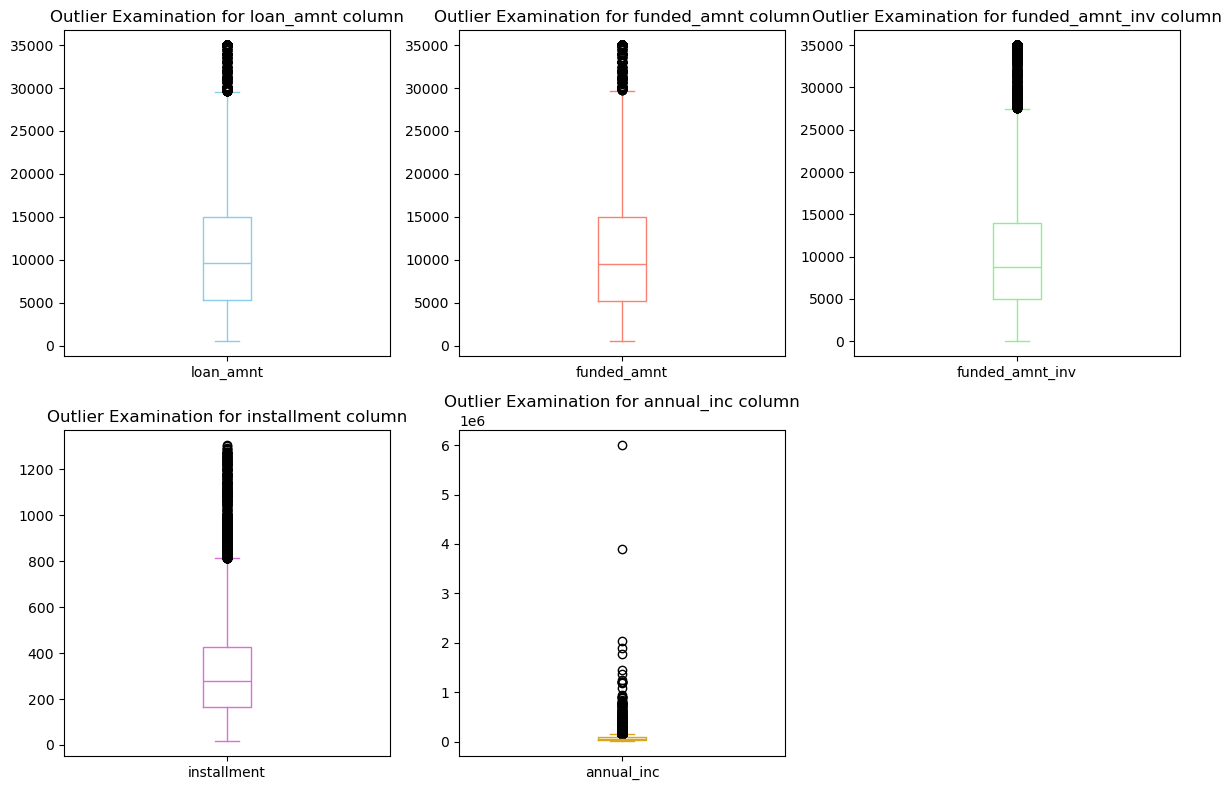

<Figure size 640x480 with 0 Axes>

In [48]:
cols = ['loan_amnt', 'funded_amnt','funded_amnt_inv','installment','annual_inc']
display(HTML("Plots boxplots to examine outliers in the specified columns of the given dataframe.\n"))
outlier_plot(df_clean, cols)
plt.show()
plt.tight_layout()

In [49]:
# Setting the upper quartile to 80% as most outliers lay outside the 80% range. 
# Removing all the outliers would lead to data loss thereby leading to wrong analysis.
Q1 = df_clean[cols].quantile(0.05)
Q3 = df_clean[cols].quantile(0.80)
IQR = Q3 - Q1

display(HTML("<br>Removing outliers based on the IQR method...\n"))
# Removing outliers based on the IQR method
df_clean = df_clean[~((df_clean[cols] < (Q1 - 1.5 * IQR)) | (df_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Note : Only removing the extreme outliers as removing all the outliers would lead to data loss and incorrect analaysis
display(HTML("<br>Note : Setting the upper quartile to 80% as most outliers lay outside the 80% range. Removing all the outliers would lead to data loss thereby leading to wrong analysis."))

##### Test

Validating if extreme outliers are removed.



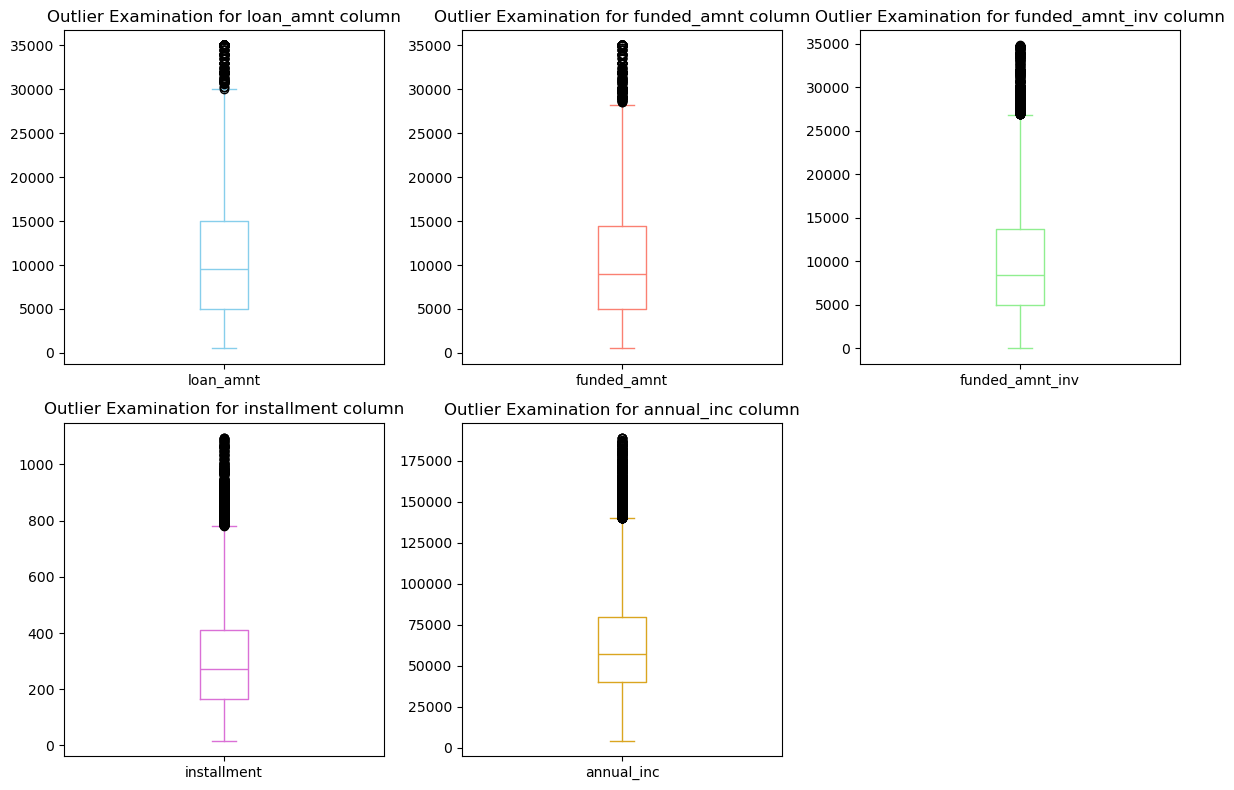

In [50]:
# Validating if extreme outliers are removed.
print("Validating if extreme outliers are removed.\n")
outlier_plot(df_clean, cols)

In [51]:
# Overview of the current shape of the datasest.
print("Number of Rows in df_clean after Cleaning : ",df_clean.shape[0],"\nNumber of columns in df_clean after Cleaning: ",df_clean.shape[1])

Number of Rows in df_clean after Cleaning :  37485 
Number of columns in df_clean after Cleaning:  23


### Below is the data dictionary for the remaining columns on which we will conduct the analysis.

In [52]:
html_table = data_dictionary.to_html().replace('<table', '<table style="font-size: 15px;"')
# Display HTML table
display(HTML(html_table))

### Below is the segregation of Customer and Loan attributes post Data Assessment and Cleaning

### Customer Attributes
###### 1. annual_inc → Float Data Type
###### 2. debt_to_income → Float Data Type
###### 3. pub_rec_bankruptcies → Float Data Type
###### 4. home_ownership → Categorical Data Type
###### 5. addr_state → String Data Type
###### 6. emp_length → Categorical Data Type

### Loan Attributes
###### 1. term → Categorical Data Type
###### 2. issue_d → DateTime Data Type
###### 3. grade → Categorical Data Type
###### 4. sub_grade → Categorical Data Type
###### 5. verification_status → Categorical Data Type
###### 6. loan_status → Categorical Data Type
###### 7. purpose → Categorical Data Type
###### 8. loan_amnt → Float Data Type
###### 9. funded_amnt → Float Data Type
###### 10. funded_amnt_inv → Float Data Type
###### 11. int_rate → Float Data Type
###### 12. installment → Float Data Type

### Derived Attributes
###### 1. issue_d_year → Integer Data Type
###### 2. issue_d_month → Categorical Data Type
###### 3. loan_amnt_b → Categorical Data Type
###### 4. debt_to_income_b → Categorical Data Type
###### 5. int_rate_b → Categorical Data Type

### Observation: 
###### Following the cleaning process, the dataset now contains 37,170 records and 23 columns. This reflects a reduction of approximately 6.41% in the number of records and an 74% reduction in the number of columns with 5 new derived columns. Subsequently, we will employ this refined dataset for our Exploratory Data Analysis (EDA), encompassing univariate, segmented univariate, bivariate, and multivariate analyses.

# Exploratory Data Analisys

#### __Univariate Analysis__ 
######  → Mean, Median, Max, Min, Std, Variance, Count
######  → Distribution ( Histogram, CountPlot, BoxPlot)
#### __Bivariate Analysis__
######  → Relationship Between 2 Variables ( ScatterPlot, BoxPlot, BarPlot etc)
#### __Multivariate Analysis__
######  → Relationship Between more variables ( Heatmap etc.)

In [53]:
numerical_columns  = df_clean.select_dtypes(exclude=['object','datetime','category']).columns.tolist()
categorical_columns = df_clean.select_dtypes(include=['category']).columns.tolist()
extra_columns = df_clean.select_dtypes(include=['object','datetime']).columns.tolist()
print("Numerical_Columns :", numerical_columns)
print("\nCateogrical_Columns :", categorical_columns)
print("\nExtra_Columns :", extra_columns)

Numerical_Columns : ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'debt_to_income', 'pub_rec_bankruptcies', 'issue_d_year']

Cateogrical_Columns : ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'issue_d_month', 'loan_amnt_b', 'int_rate_b', 'debt_to_income_b']

Extra_Columns : ['issue_d', 'purpose', 'addr_state']


## Univariate Exploration

In [54]:
# Class for performing univariate analysis on a specified column in a DataFrame.
class UnivariateAnalysis:
    # Initializes the UnivariateAnalysis object with the given DataFrame.
    def __init__(self, dataframe,column_name):       
        self.dataframe = dataframe
        self.column_name = column_name
        print(f"Initiating detailed analysis of {column_name}...")
        print(f"\nStatistical summary for {self.column_name}:\n{self.dataframe[self.column_name].describe()}")
        mode = self.dataframe[self.column_name].mode()[0]
        print(f"\nThe mode of {self.column_name} is: {mode}\n")

    # Performs univariate analysis on the specified column with bins.
    def analyze_with_bins(self, bin_range=None, discrete=False, value_counts=False):
        sns.set_style('whitegrid')
        plt.figure(figsize=(12, 6))
        print(f"Count summary for {self.column_name}:\n{self.dataframe[self.column_name].value_counts()}") if value_counts else ''
        sns.histplot(data=self.dataframe, x=self.column_name, bins=bin_range, discrete=discrete, kde=True, color='skyblue') if bin_range else sns.histplot(data=self.dataframe, x=self.column_name, kde=True, color='skyblue')
        plt.title(f'Distribution of {self.column_name}', fontsize=16, fontweight='bold')
        
        plt.xlabel(self.column_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(bin_range, rotation=45, fontsize=12) if bin_range else plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.tight_layout()
        plt.show()

    # Performs univariate analysis on the specified column without bins.
    def analyze_without_bins(self):
        sns.set_style('whitegrid')
    
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(data=self.dataframe, x=self.column_name, ax=ax[0], kde=True, color='salmon')
        ax[0].set_title(f'{self.column_name} Histogram', fontsize=16, fontweight='bold')
    
        sns.boxplot(data=self.dataframe, y=self.column_name, ax=ax[1], palette='muted')
        ax[1].set_title(f'{self.column_name} Box Plot', fontsize=16, fontweight='bold')
    
        for axis in ax:
            axis.set_xlabel(self.column_name, fontsize=14)
            axis.set_ylabel('Frequency', fontsize=14)
            axis.tick_params(axis="x", rotation=45, labelsize=12)
            axis.tick_params(axis="y", labelsize=12)
    
        plt.tight_layout()
        plt.show()

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count    37485.000000
mean     10678.593437
std       6884.877579
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



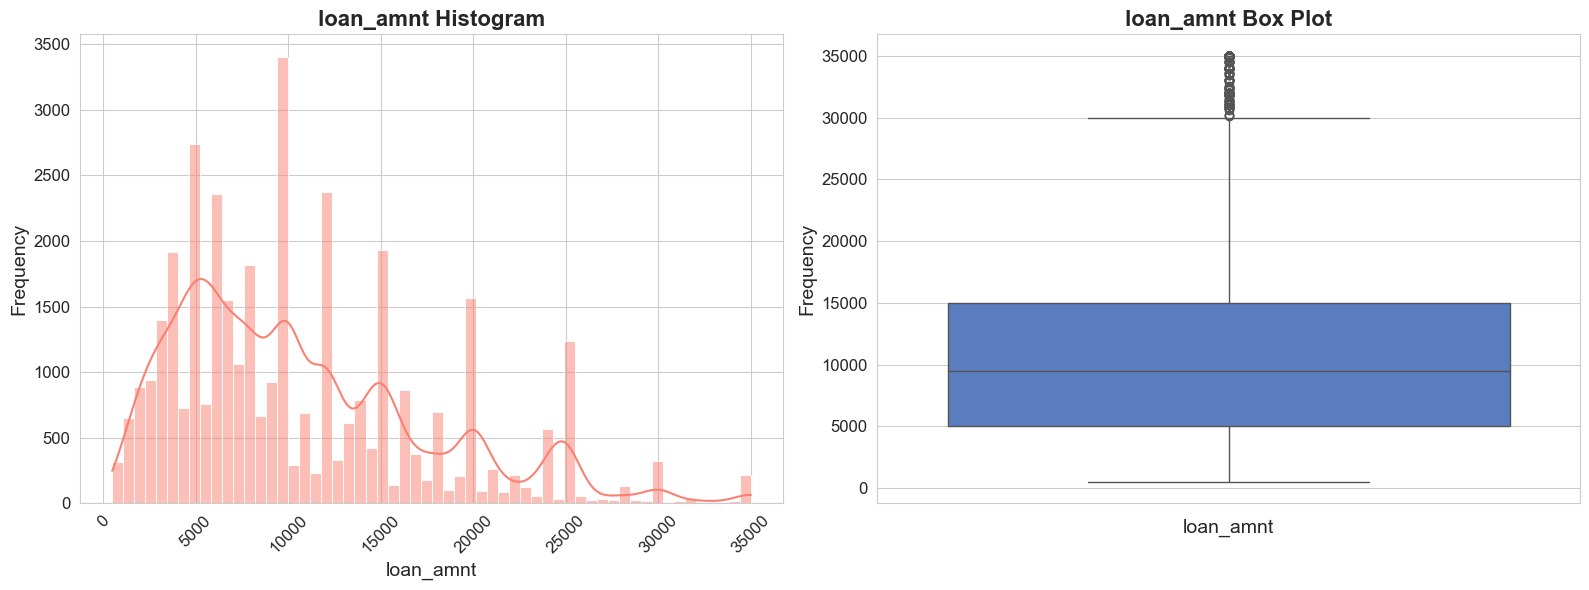

In [55]:
univariate_analysis = UnivariateAnalysis(df_clean, 'loan_amnt')
univariate_analysis.analyze_without_bins()

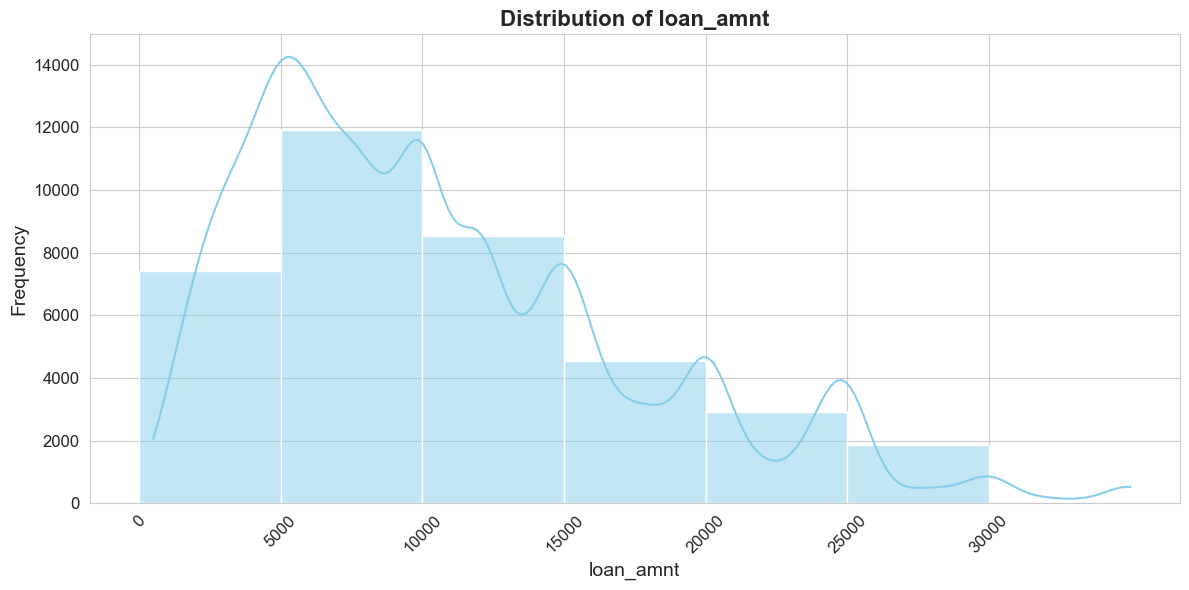

In [56]:
univariate_analysis.analyze_with_bins(bin_range=range(0, 35000, 5000))

### Observation:
###### The distribution depicted above is right-skewed, indicating that the majority of loan application amounts fell between 5000-10000, followed by 0-5000 and then 10000-15000. However, the mean loan amount is 10678 and the mode is 10000.

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count     37485.00000
mean      63517.37955
std       32070.74777
min        4000.00000
25%       40000.00000
50%       57000.00000
75%       80000.00000
max      189000.00000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



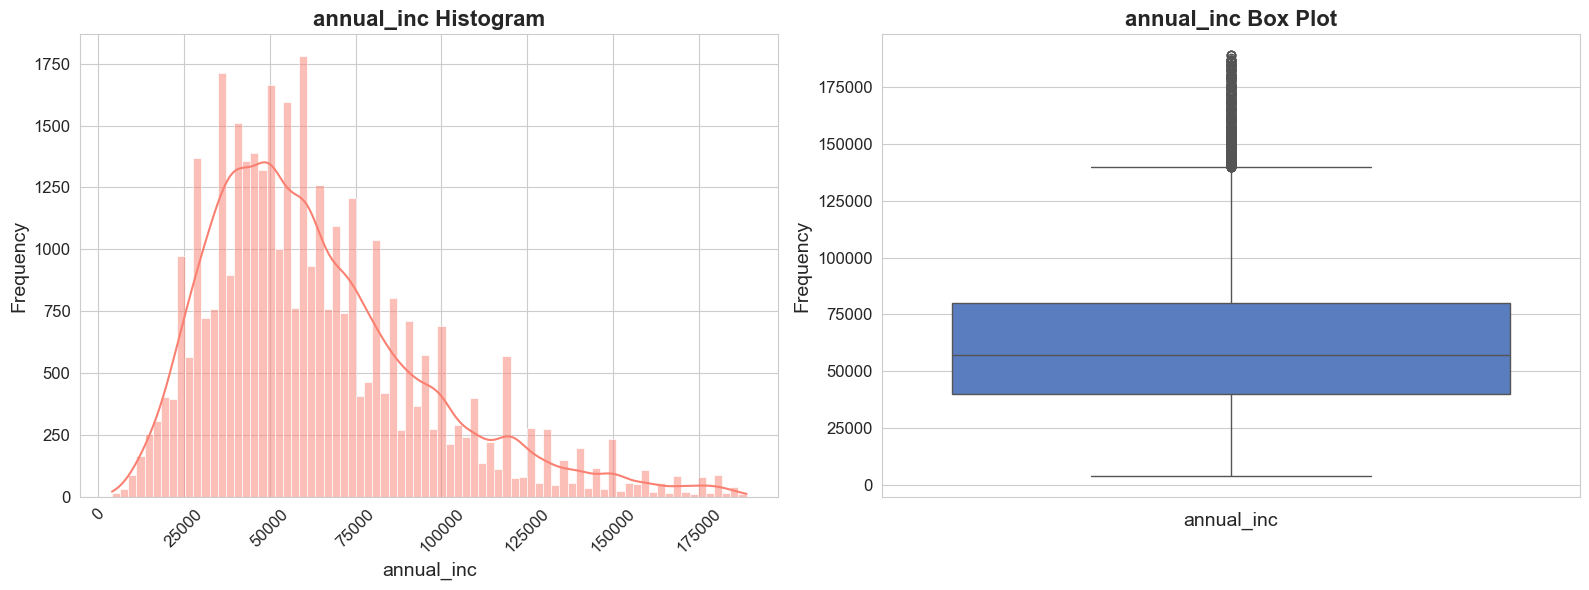

In [57]:
univariate_analysis = UnivariateAnalysis(df_clean, 'annual_inc')
univariate_analysis.analyze_without_bins()

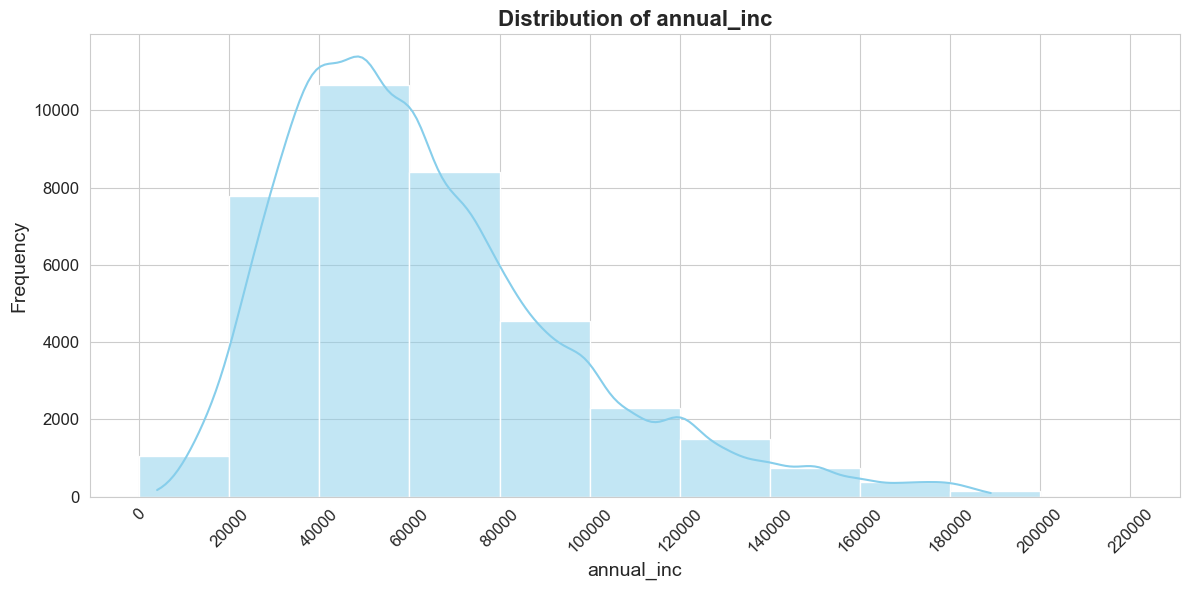

In [58]:
univariate_analysis.analyze_with_bins(bin_range=range(0, 240000, 20000))

### Observation: 
###### The above distribution is right skewed and most of the loan application where from customers whose annual income lies between 40000-60000. The mean of annual income of the customers is 63517 and the mode is 60000.

Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    37485.000000
mean        11.878059
std          3.661481
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

The mode of int_rate is: 10.99



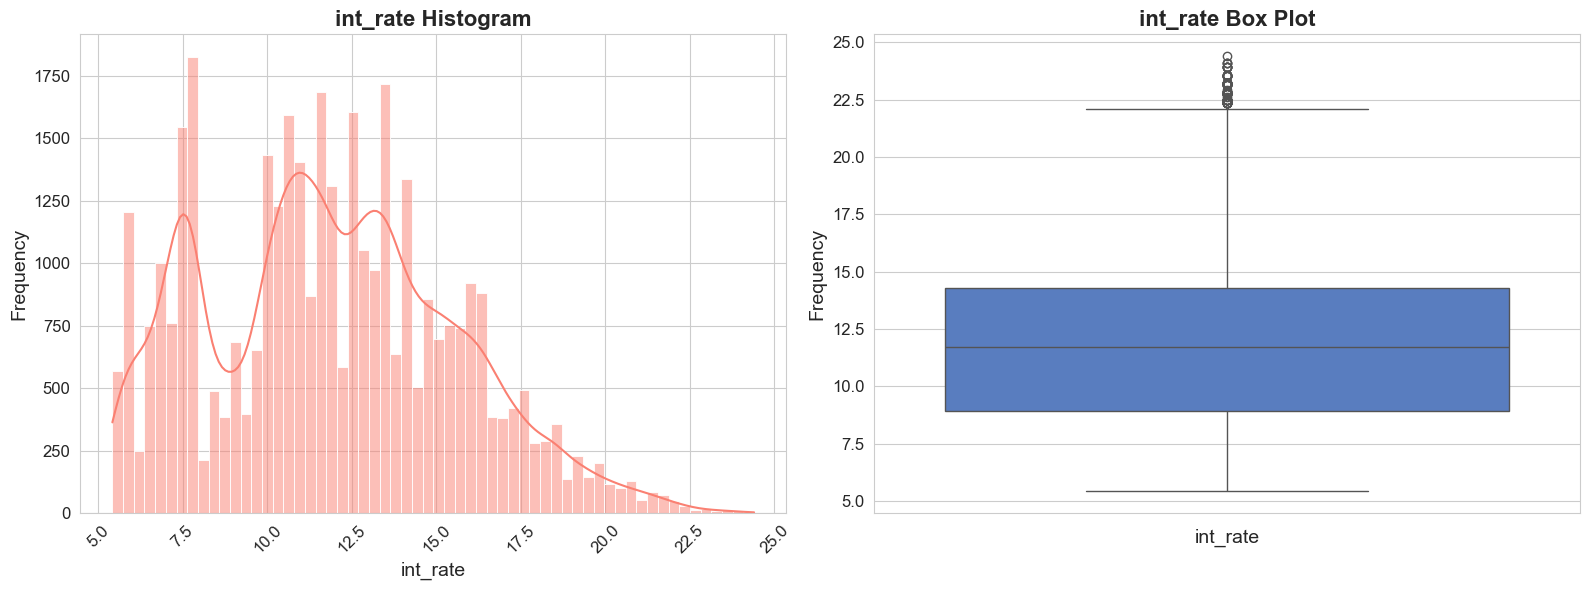

In [59]:
univariate_analysis = UnivariateAnalysis(df_clean, 'int_rate')
univariate_analysis.analyze_without_bins()

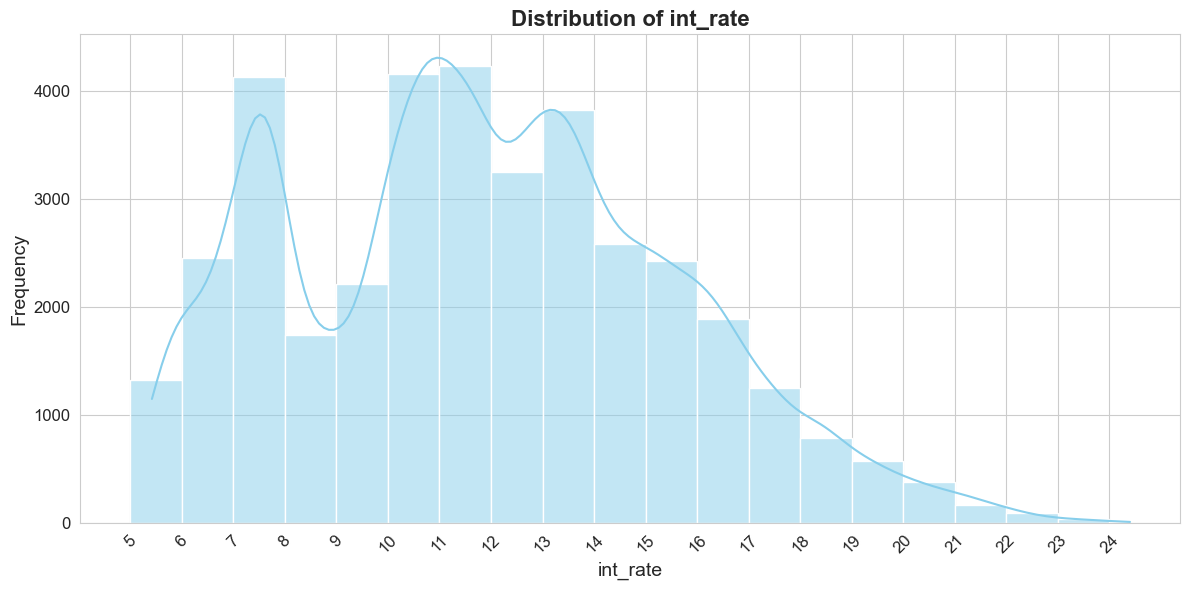

In [60]:
univariate_analysis.analyze_with_bins(bin_range=range(5, 25, 1))

### Observation: 
###### The above distribution is non-symmetric bimodal and most of the loans had an interest rate between 11%-12%, followed by 10%-11% and then 7%-8%. Also there is a sudden drop in loans where the interest rate is 7%-9%.

Initiating detailed analysis of issue_d_year...

Statistical summary for issue_d_year:
count    37485.000000
mean      2010.303188
std          0.883444
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

The mode of issue_d_year is: 2011

Count summary for issue_d_year:
issue_d_year
2011    19775
2010    11318
2009     4614
2008     1538
2007      240
Name: count, dtype: int64


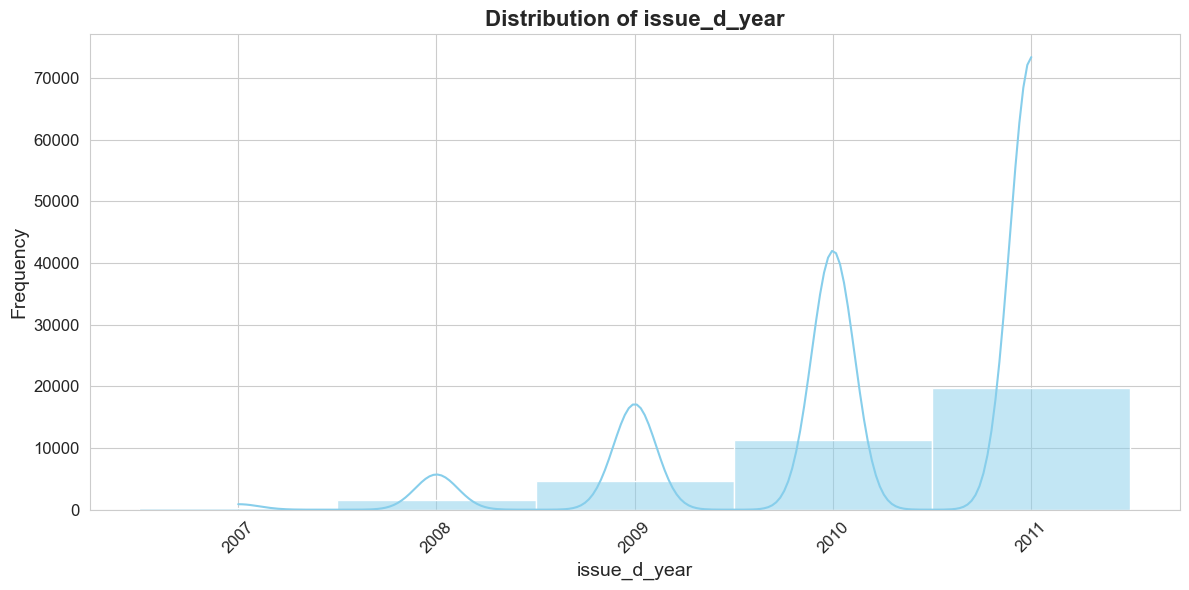

In [61]:
year_range = df_clean.issue_d_year.unique().tolist()
univariate_analysis = UnivariateAnalysis(df_clean, 'issue_d_year')
univariate_analysis.analyze_with_bins(bin_range=year_range, discrete=True, value_counts=True)

### Observation:

###### The distribution shown above exhibits left skewness, indicating that the majority of loans were issued in the year 2011, while the least number of loans were issued in 2007.

Initiating detailed analysis of term...

Statistical summary for term:
count          37485
unique             2
top        36 months
freq           28417
Name: term, dtype: object

The mode of term is:  36 months

Count summary for term:
term
 36 months    28417
 60 months     9068
Name: count, dtype: int64


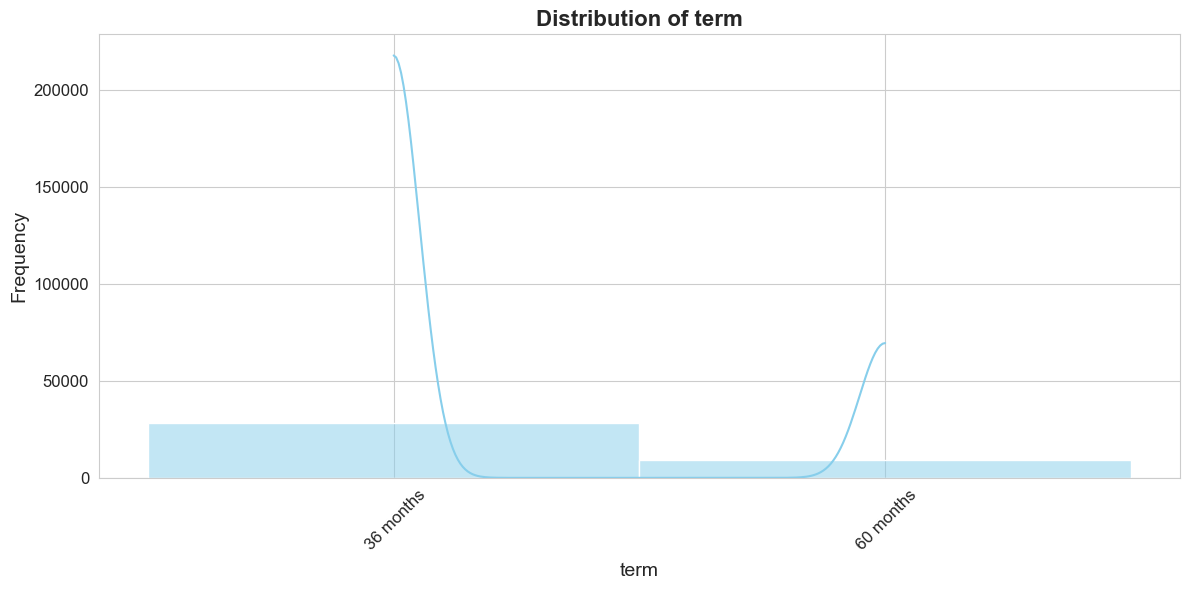

Initiating detailed analysis of grade...

Statistical summary for grade:
count     37485
unique        7
top           B
freq      11394
Name: grade, dtype: object

The mode of grade is: B

Count summary for grade:
grade
B    11394
A     9873
C     7615
D     4924
E     2508
F      900
G      271
Name: count, dtype: int64


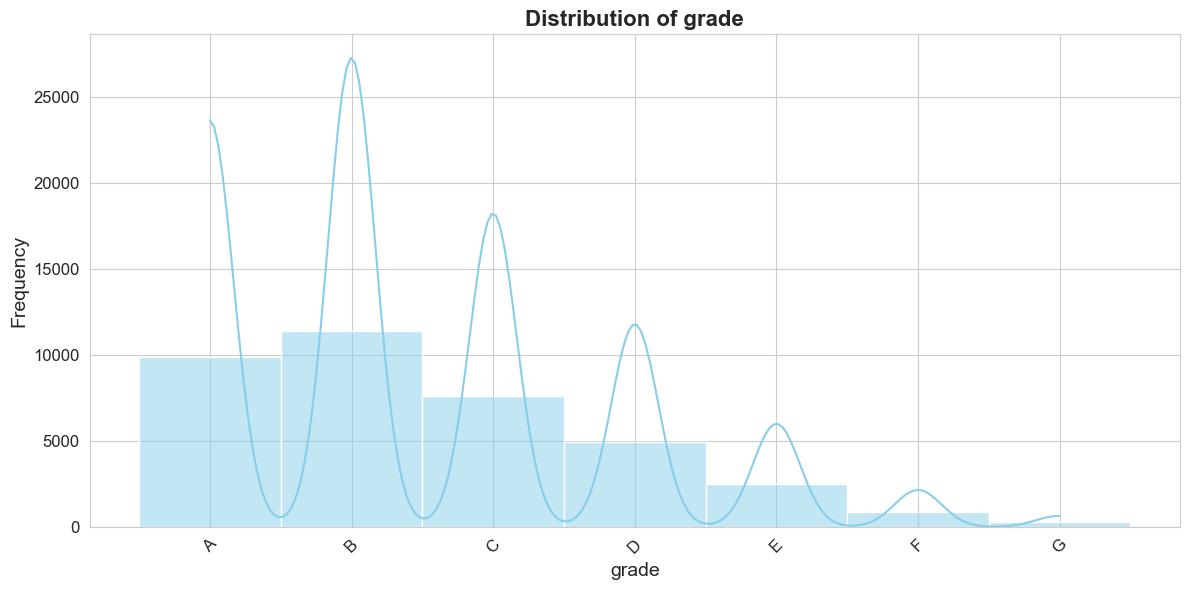

Initiating detailed analysis of sub_grade...

Statistical summary for sub_grade:
count     37485
unique        5
top           4
freq       7865
Name: sub_grade, dtype: object

The mode of sub_grade is: 4

Count summary for sub_grade:
sub_grade
4    7865
3    7743
5    7598
2    7434
1    6845
Name: count, dtype: int64


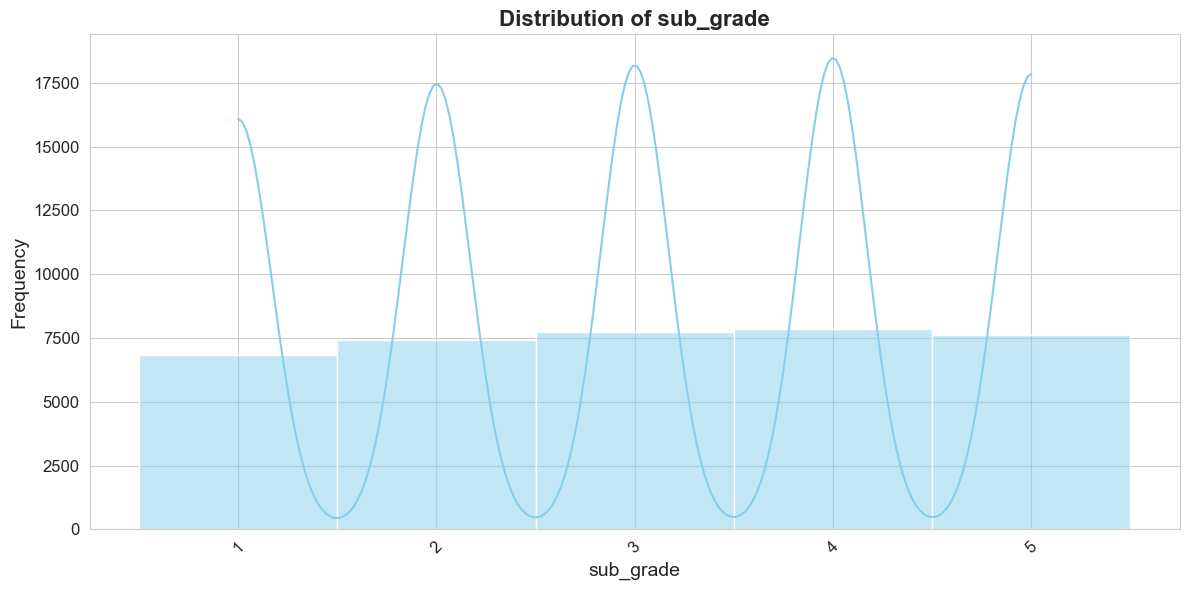

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     37485
unique       11
top         10 
freq       9131
Name: emp_length, dtype: object

The mode of emp_length is: 10 

Count summary for emp_length:
emp_length
10     9131
0      4414
2      4184
3      3924
4      3247
5      3113
1      3110
6      2114
7      1671
8      1377
9      1200
Name: count, dtype: int64


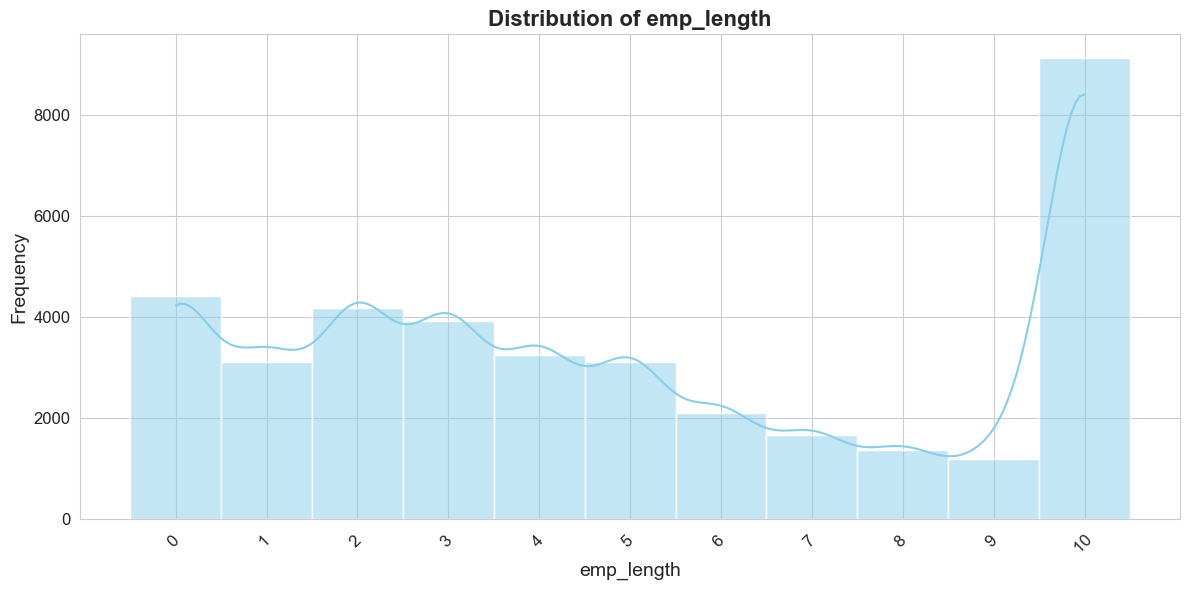

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     37485
unique        5
top        RENT
freq      18240
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT

Count summary for home_ownership:
home_ownership
RENT        18240
MORTGAGE    16241
OWN          2906
OTHER          95
NONE            3
Name: count, dtype: int64


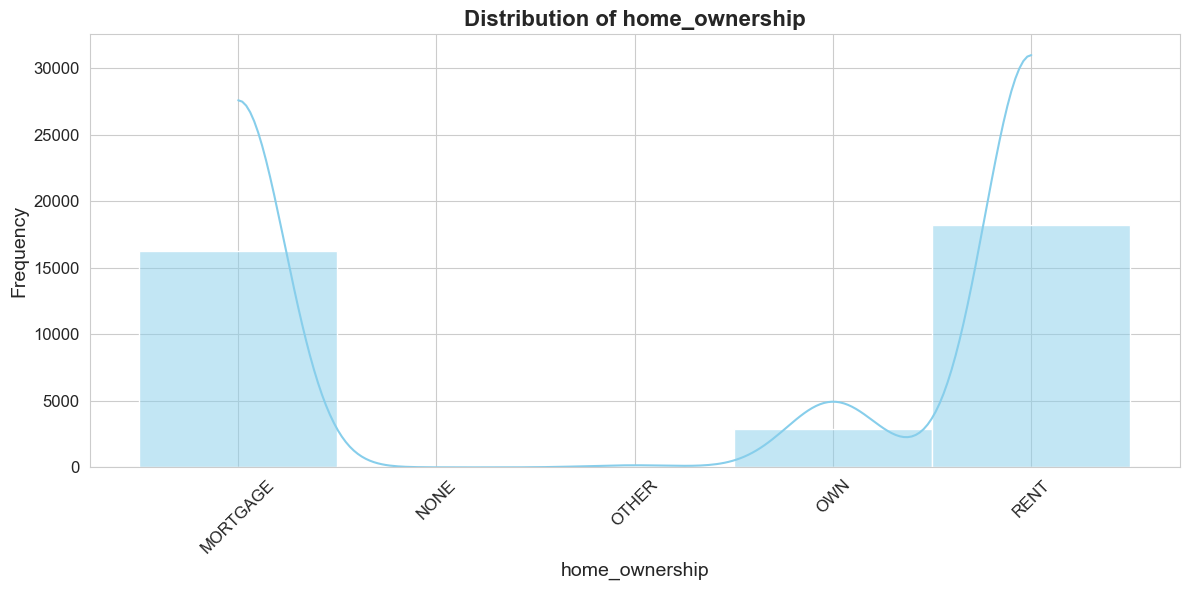

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count            37485
unique               3
top       Not Verified
freq             16528
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified

Count summary for verification_status:
verification_status
Not Verified       16528
Verified           11558
Source Verified     9399
Name: count, dtype: int64


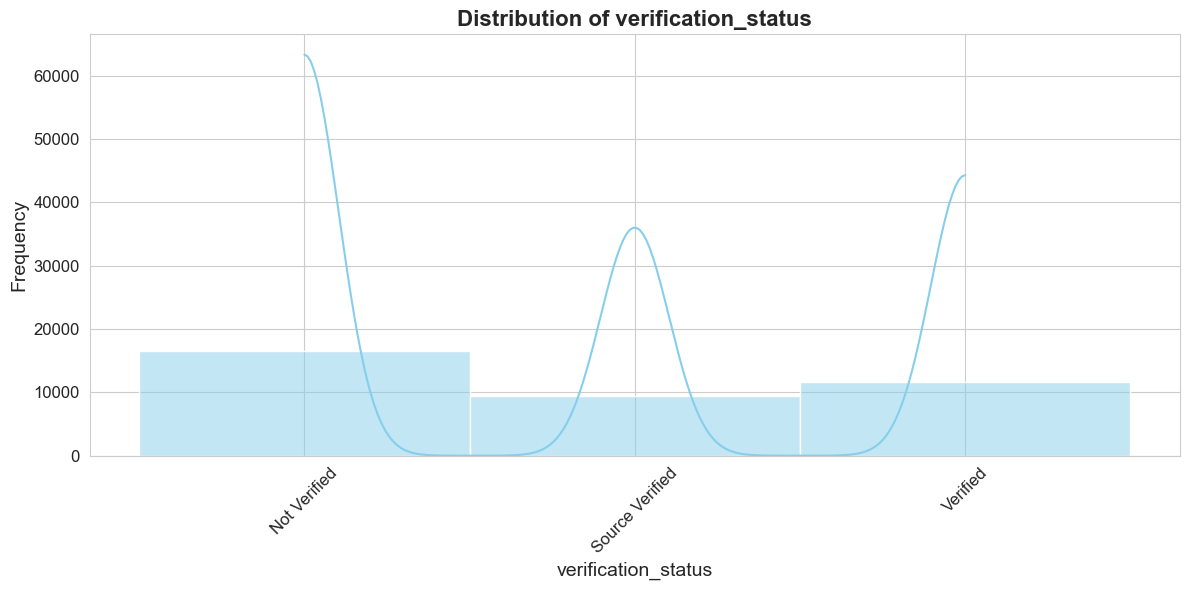

Initiating detailed analysis of loan_status...

Statistical summary for loan_status:
count          37485
unique             2
top       Fully Paid
freq           32026
Name: loan_status, dtype: object

The mode of loan_status is: Fully Paid

Count summary for loan_status:
loan_status
Fully Paid     32026
Charged Off     5459
Name: count, dtype: int64


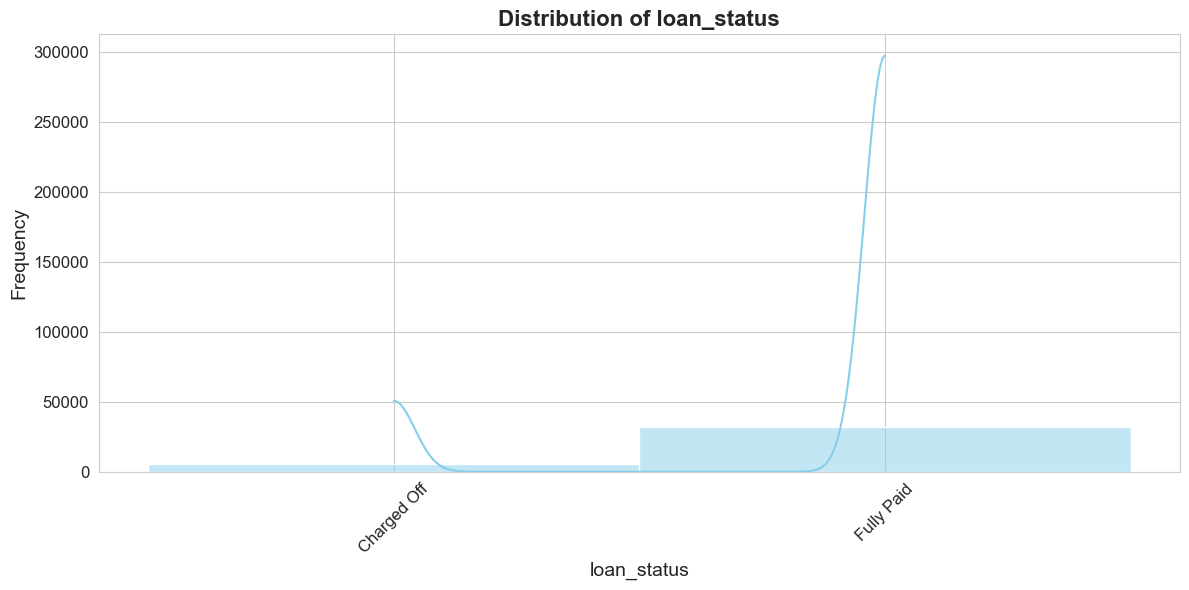

Initiating detailed analysis of issue_d_month...

Statistical summary for issue_d_month:
count        37485
unique          12
top       December
freq          4101
Name: issue_d_month, dtype: object

The mode of issue_d_month is: December

Count summary for issue_d_month:
issue_d_month
December     4101
November     3876
October      3613
September    3390
August       3285
July         3272
June         3093
May          2848
April        2749
March        2621
January      2332
February     2305
Name: count, dtype: int64


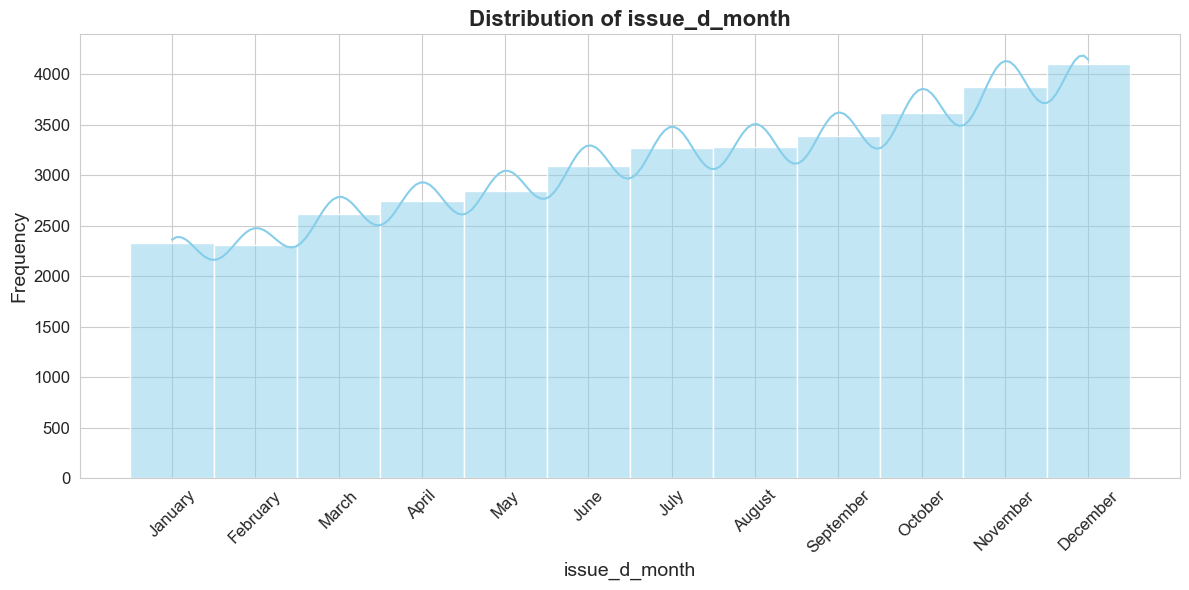

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count          37485
unique             7
top       5000-10000
freq           12677
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000

Count summary for loan_amnt_b:
loan_amnt_b
5000-10000     12677
0-5000          9411
10000-15000     7553
15000-20000     4228
20000-25000     2657
25000-30000      643
30000-35000      316
Name: count, dtype: int64


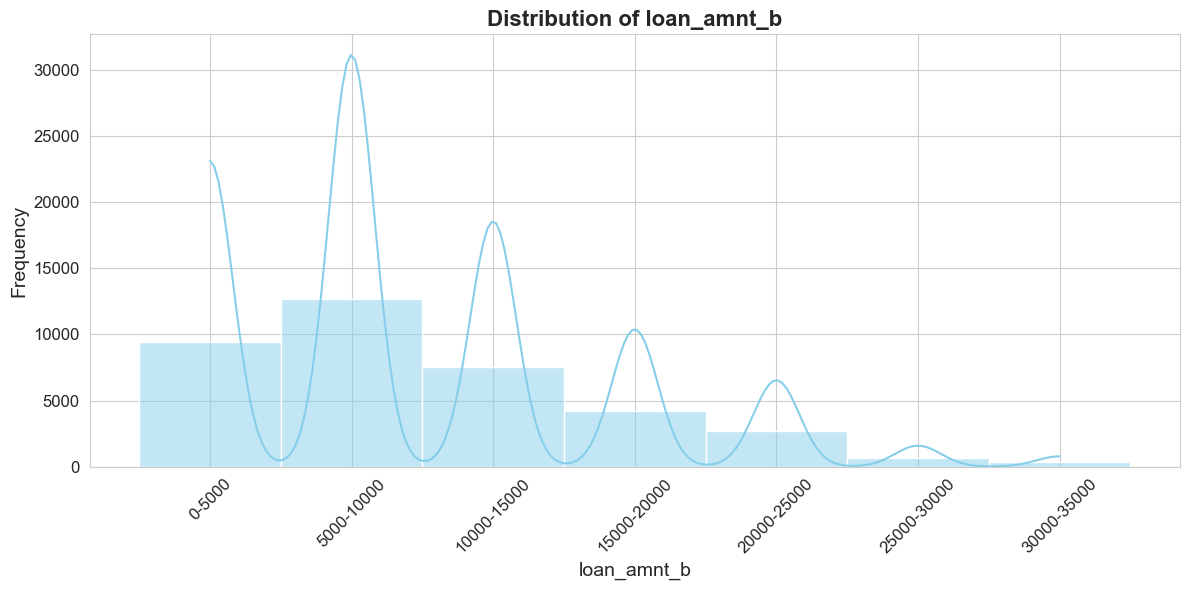

Initiating detailed analysis of int_rate_b...

Statistical summary for int_rate_b:
count     37485
unique       11
top       10-12
freq       8146
Name: int_rate_b, dtype: object

The mode of int_rate_b is: 10-12

Count summary for int_rate_b:
int_rate_b
10-12    8146
12-14    7073
6-8      6759
14-16    5096
8-10     4003
16-18    3037
18-20    1362
4-6      1335
20-22     546
22-24     124
24-26       4
0-2         0
2-4         0
Name: count, dtype: int64


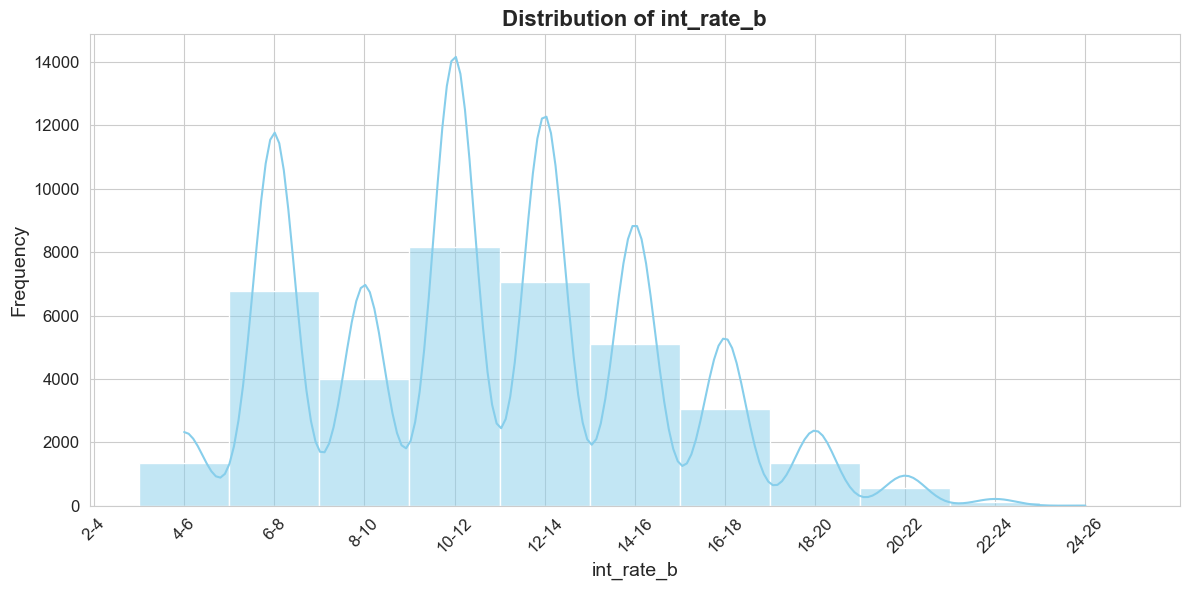

Initiating detailed analysis of debt_to_income_b...

Statistical summary for debt_to_income_b:
count     37485
unique       15
top       12-14
freq       3809
Name: debt_to_income_b, dtype: object

The mode of debt_to_income_b is: 12-14

Count summary for debt_to_income_b:
debt_to_income_b
12-14    3809
14-16    3805
10-12    3621
16-18    3472
8-10     3363
18-20    3321
6-8      2903
20-22    2900
22-24    2555
4-6      2490
2-4      1865
0-2      1728
24-26    1188
26-28     277
28-30     188
Name: count, dtype: int64


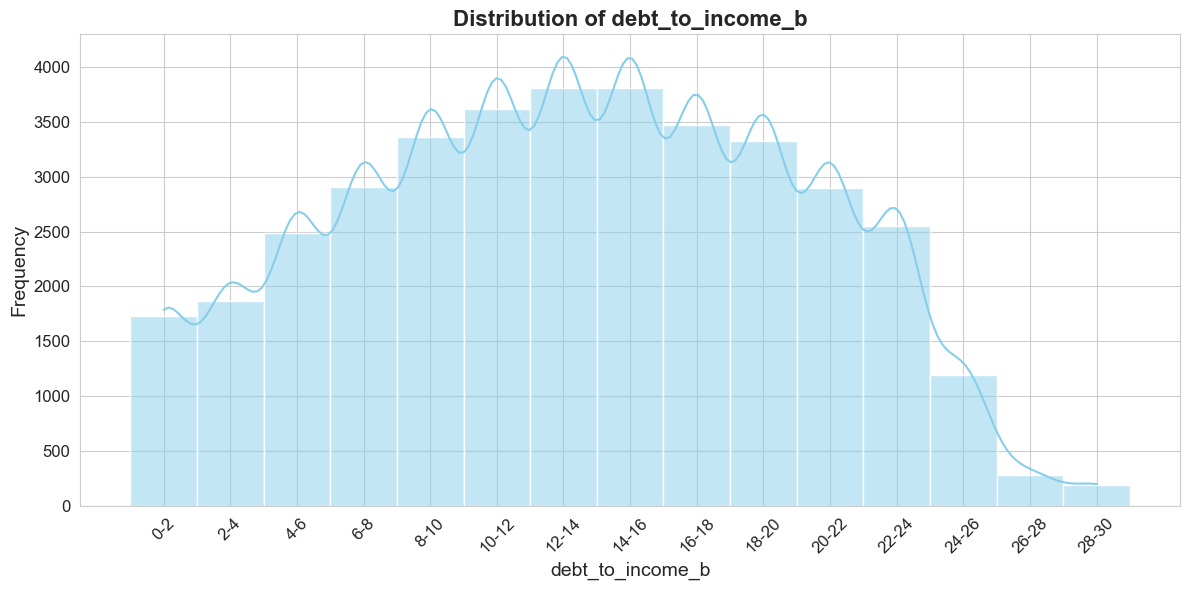

In [62]:
for category in categorical_columns:
        univariate_analysis = UnivariateAnalysis(df_clean, category)
        univariate_analysis.analyze_with_bins(value_counts=True)

### Observation:

###### 1. **debt_to_income_b**: It is a normally distributed graph with peak between 12 and 14 which indicates that the most of customers had a debt-to-income ratio within this range.
   
###### 2. **loan_amount_b**: The graph indicates a right-skewed distribution with the peak indicating that most of loans are for amounts between 5,000 and 10,000.

###### 3. **int_rate_b**: The distribution indicates that most of loans are between 10%-12%.

###### 4. **issue_b_month**: The distribution is left-skewed, which indicates that most loan applications were issued in December,and the lowest in February.
   
###### 5. **loan_status**: There are around 32,026 customers who have their loan status as fully paid while around 5,459 customers have loan status as charged-off.
   
###### 6. **verification_status**: Around 16,528 customers who have been issued loans arent verified.
   
###### 7. **home_ownership**: The majority of customers (around 18,240) have a home ownership status of "RENT," followed by 16,241 with "MORTGAGE," and only 2,906 who own their home.
   
###### 8. **emp_length**: Customers with over 10 years of employment have applied for the most loans and that is around 9,131 applications.
   
###### 9. **sub_grade**: Loans issued under subgrade 4 are the most common, while subgrade 1 has the least.
   
###### 10. **grade**: The highest number of loans are issued under grade B (around 11,394), while the lowest is for grade G.
   
###### 11. **term**: The majority of loans have a term of 36 months.

## Segmented Univariate Exploration

###### Segmenting the loan status into 'fully_paid' and 'charged_off' and analyzing the variables that impact the loan status.

##### Loan Status → Fully Paid 

In [81]:
# Creating a dataframe for Segment Fully Paid 
print("Creating a new dataframe \"df_fully_paid\" for analysis")
df_fully_paid = df_clean[df_clean['loan_status'] == 'Fully Paid']
print("\nNumber of Rows in df_fully_paid after Cleaning : ",df_fully_paid.shape[0],"\n\nNumber of columns in df_fully_paid after Cleaning: ",df_fully_paid.shape[1])

Creating a new dataframe "df_fully_paid" for analysis

Number of Rows in df_fully_paid after Cleaning :  32026 

Number of columns in df_fully_paid after Cleaning:  23


##### Loan Status → Charged Off 

In [82]:
print("Creating a new dataframe \"df_charged_off\" for analysis")
df_charged_off = df_clean[df_clean['loan_status'] == 'Charged Off']
print("\nNumber of Rows in df_fully_paid after Cleaning : ",df_charged_off.shape[0],"\n\nNumber of columns in df_fully_paid after Cleaning: ",df_charged_off.shape[1])

Creating a new dataframe "df_charged_off" for analysis

Number of Rows in df_fully_paid after Cleaning :  5459 

Number of columns in df_fully_paid after Cleaning:  23


Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    32026.000000
mean        11.561643
std          3.575163
min          5.420000
25%          8.490000
50%         11.490000
75%         13.980000
max         24.110000
Name: int_rate, dtype: float64

The mode of int_rate is: 10.99



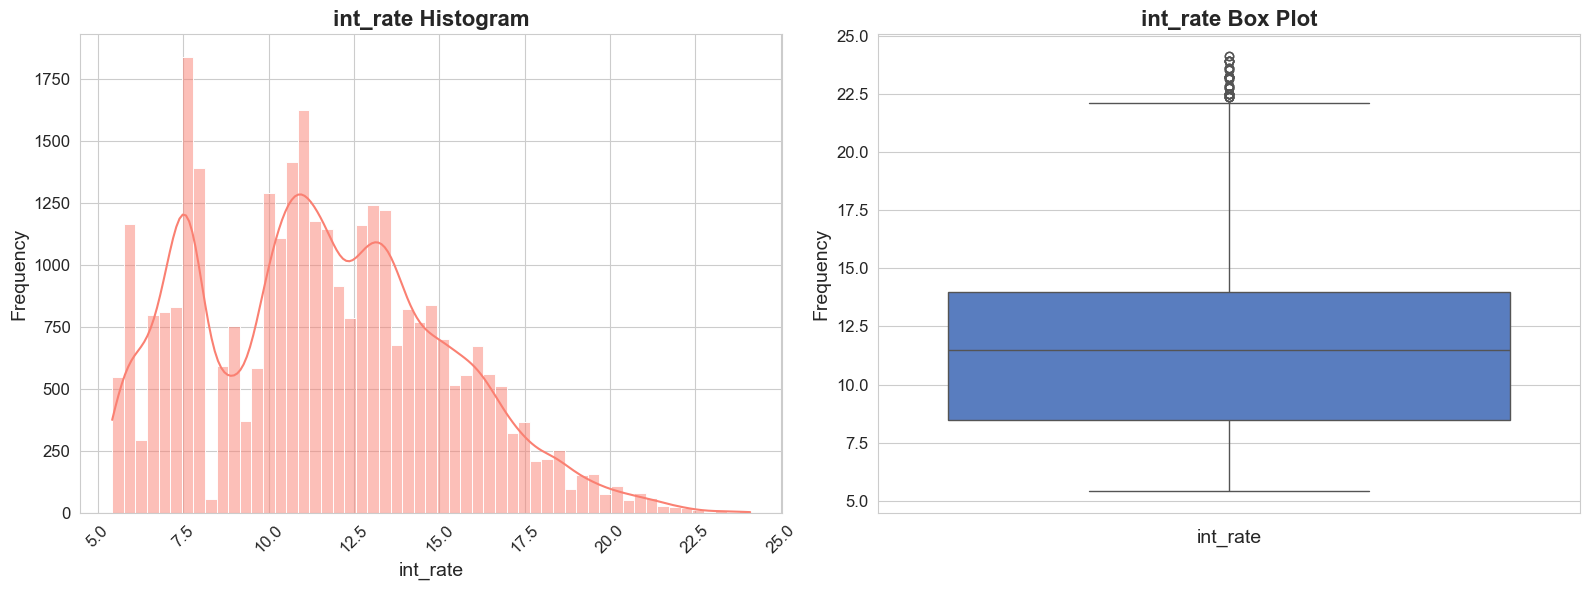

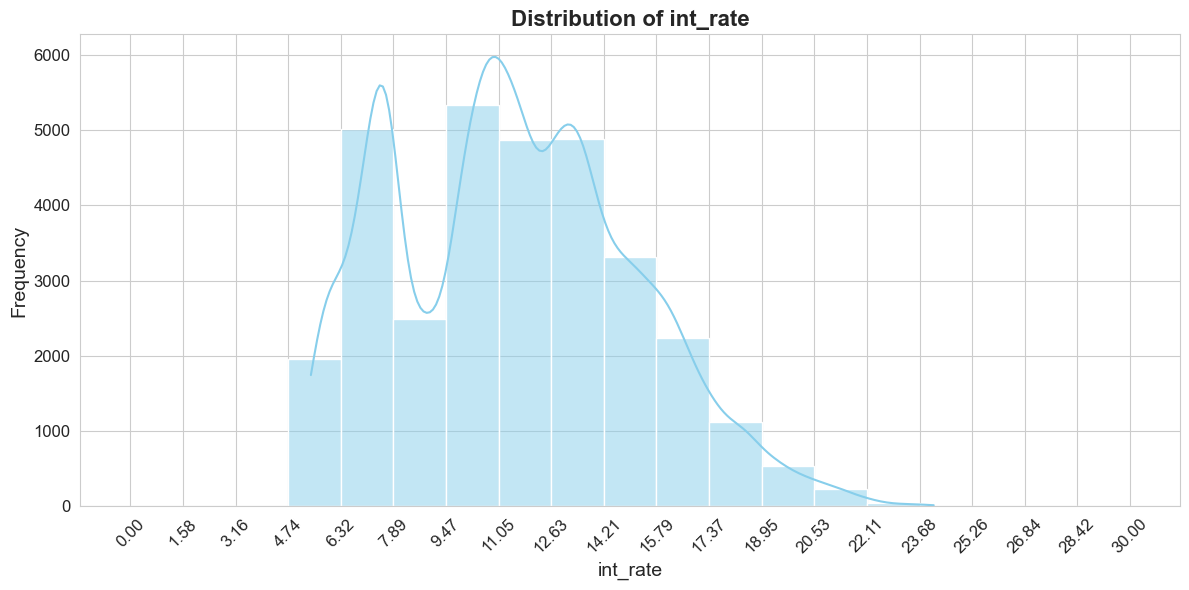

Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    5459.000000
mean       13.734362
std         3.611106
min         5.420000
25%        11.140000
50%        13.490000
75%        16.320000
max        24.400000
Name: int_rate, dtype: float64

The mode of int_rate is: 11.49



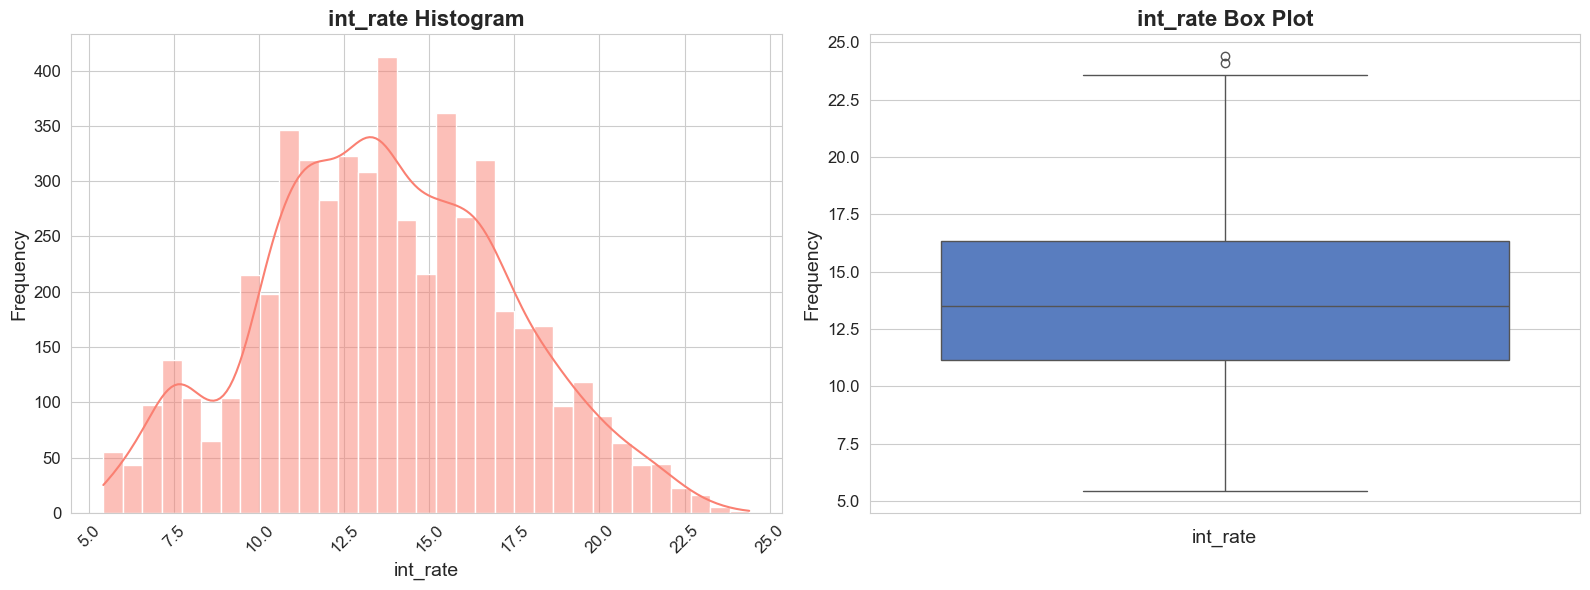

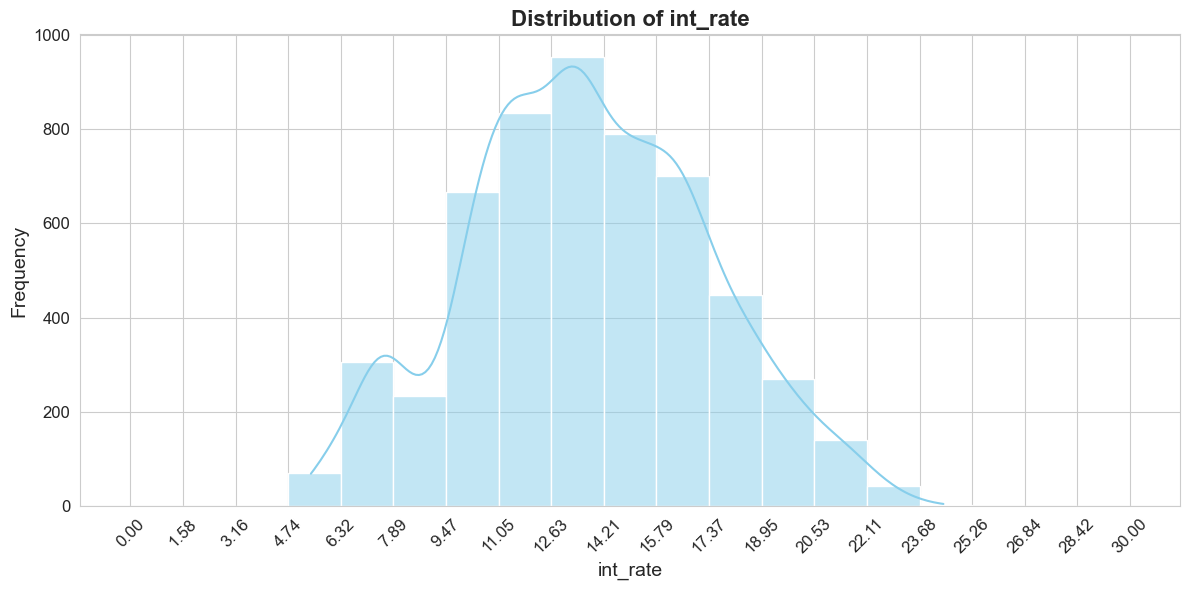

In [65]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'int_rate')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=list(np.linspace(0.0, 30.0, 20)))
univariate_analysis = UnivariateAnalysis(df_charged_off, 'int_rate')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=list(np.linspace(0.0, 30.0, 20)))

### Observations

###### **Interest Rate (int_rate)**: Loans tend to be fully paid off more frequently when the interest rate falls between approximately 9.4% and 11.0%. Conversely, there is a higher likelihood of default when interest rates are approximately between 12.5% and 14.2%.

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count     32026.000000
mean      64411.371832
std       32263.098470
min        4000.000000
25%       40500.000000
50%       58000.000000
75%       80000.000000
max      189000.000000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



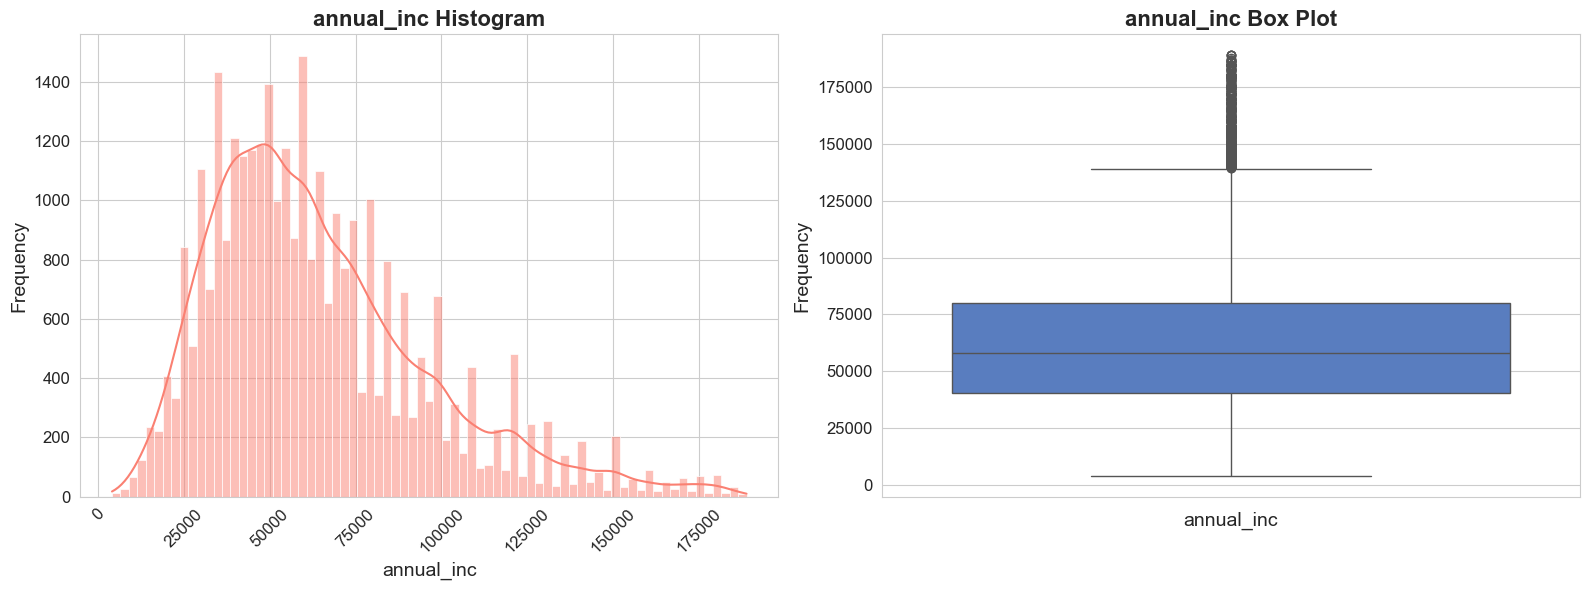

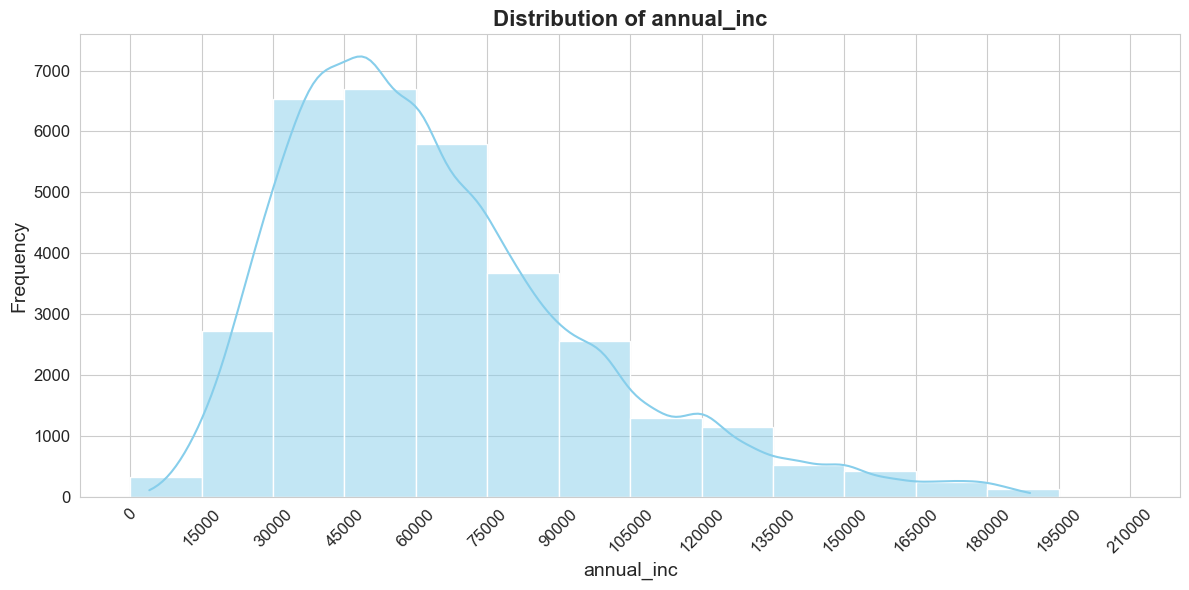

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count      5459.000000
mean      58272.646664
std       30395.899329
min        4080.000000
25%       36500.000000
50%       52000.000000
75%       72000.000000
max      187000.000000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



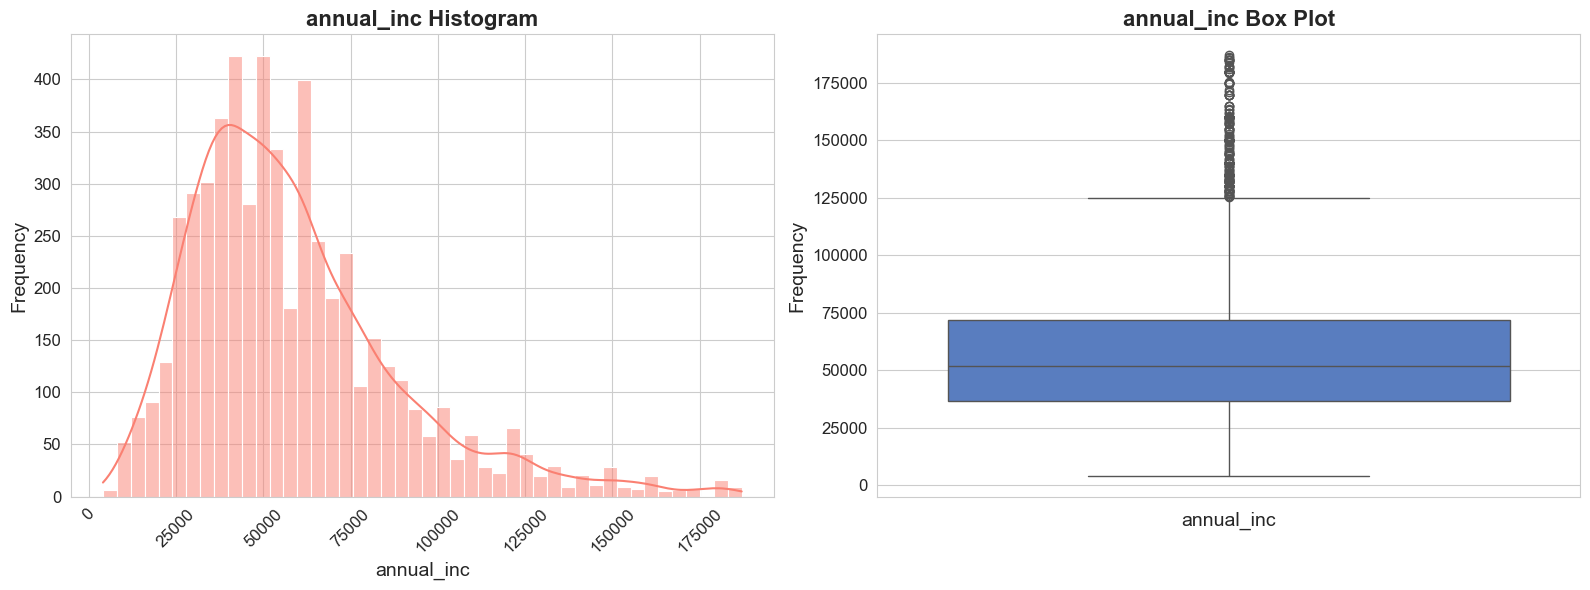

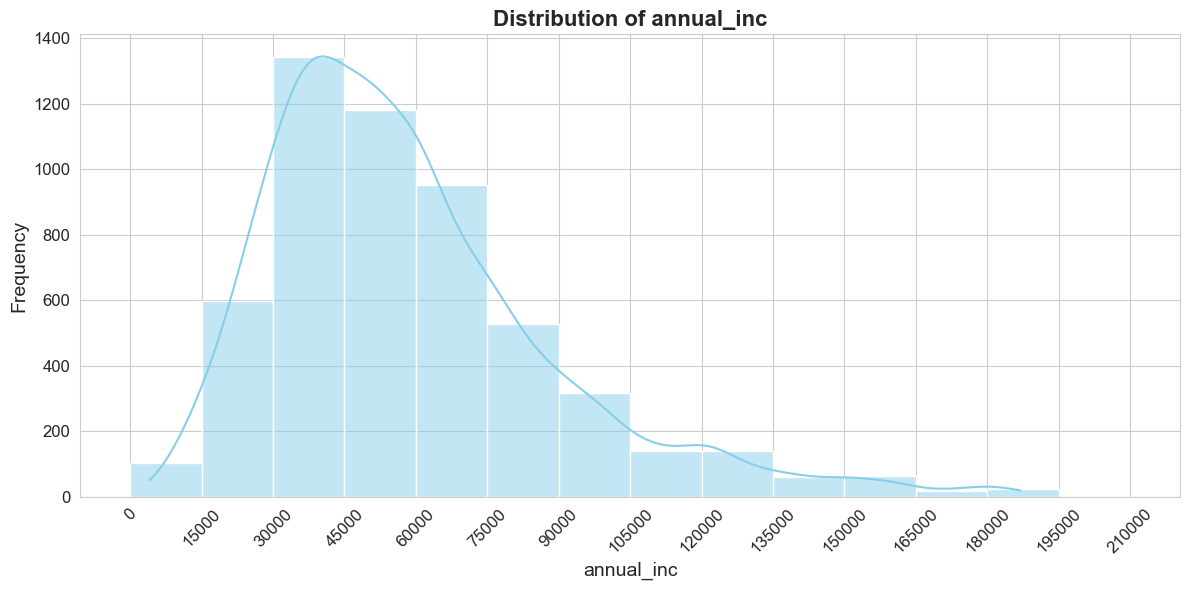

In [66]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'annual_inc')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 220000, 15000))
univariate_analysis = UnivariateAnalysis(df_charged_off, 'annual_inc')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 220000, 15000))

### Observations

###### **Annual Income (annual_inc)**: Loans are most frequently fully paid when the annual income is between 45K-60K. In contrast, there are more charged-off loans when the annual income is between 30K-45K.

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count    32026.000000
mean     10520.196871
std       6760.853423
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



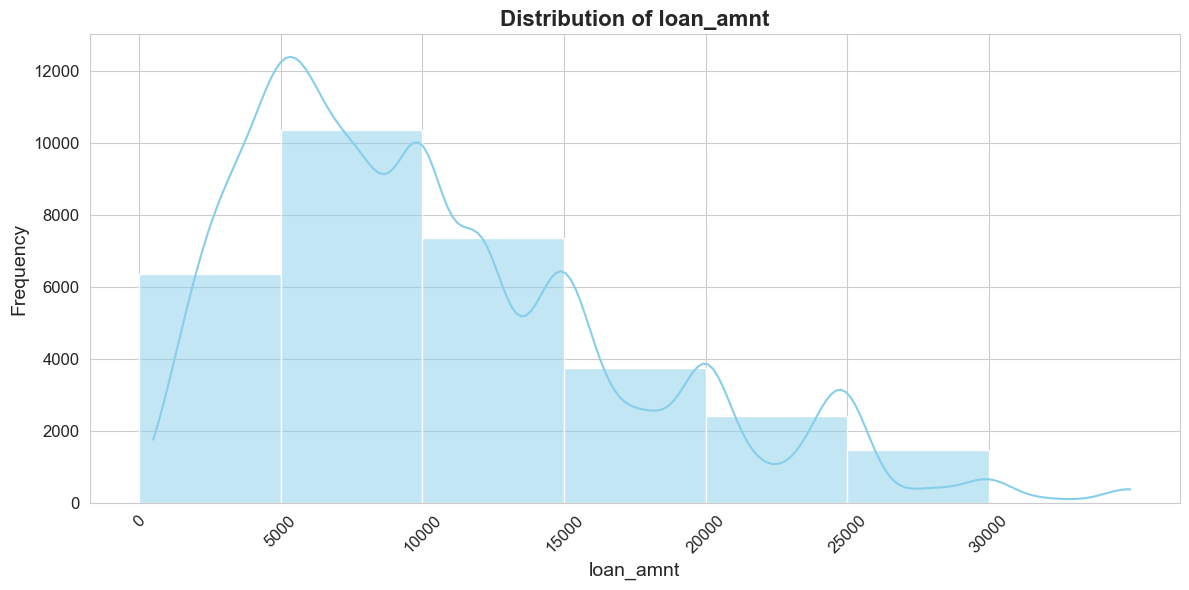

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count     5459.000000
mean     11607.849423
std       7505.301274
min        900.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



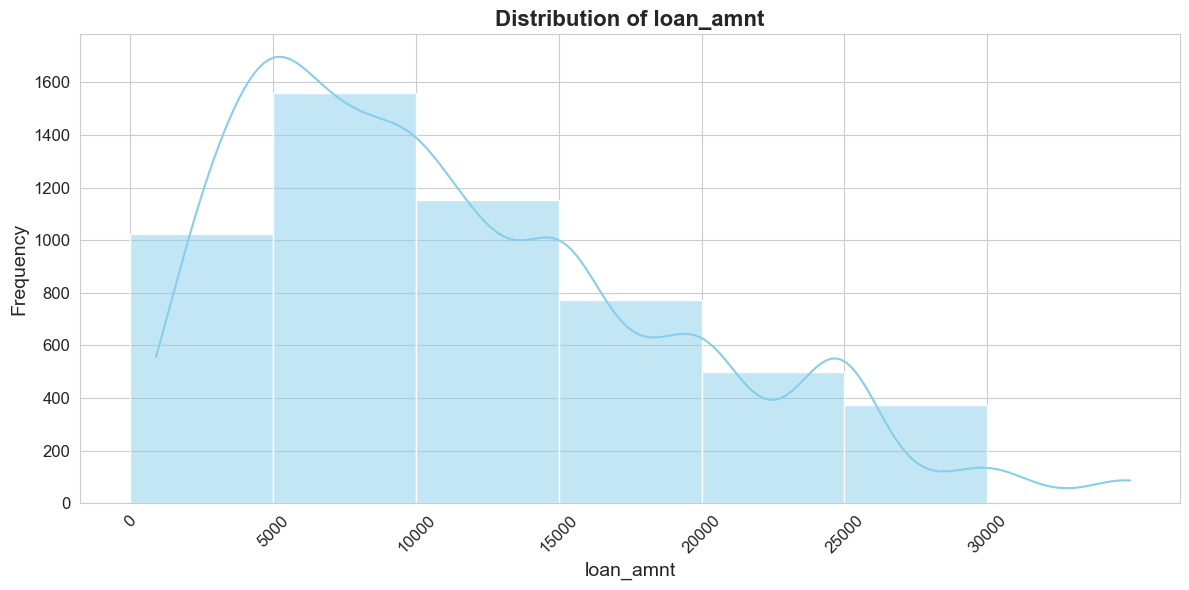

In [67]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'loan_amnt')
univariate_analysis.analyze_with_bins(bin_range=range(0, 35000, 5000))
univariate_analysis = UnivariateAnalysis(df_charged_off, 'loan_amnt')
univariate_analysis.analyze_with_bins(bin_range=range(0, 35000, 5000))

### Observations

###### **Loan Amount (loan_amount)**: Charge-offs are notably high for loan amounts between 5K-10K. However, further analysis is needed to understand the distribution of fully paid loans within this range.

Initiating detailed analysis of int_rate_b...

Statistical summary for int_rate_b:
count     32026
unique       11
top       10-12
freq       7097
Name: int_rate_b, dtype: object

The mode of int_rate_b is: 10-12



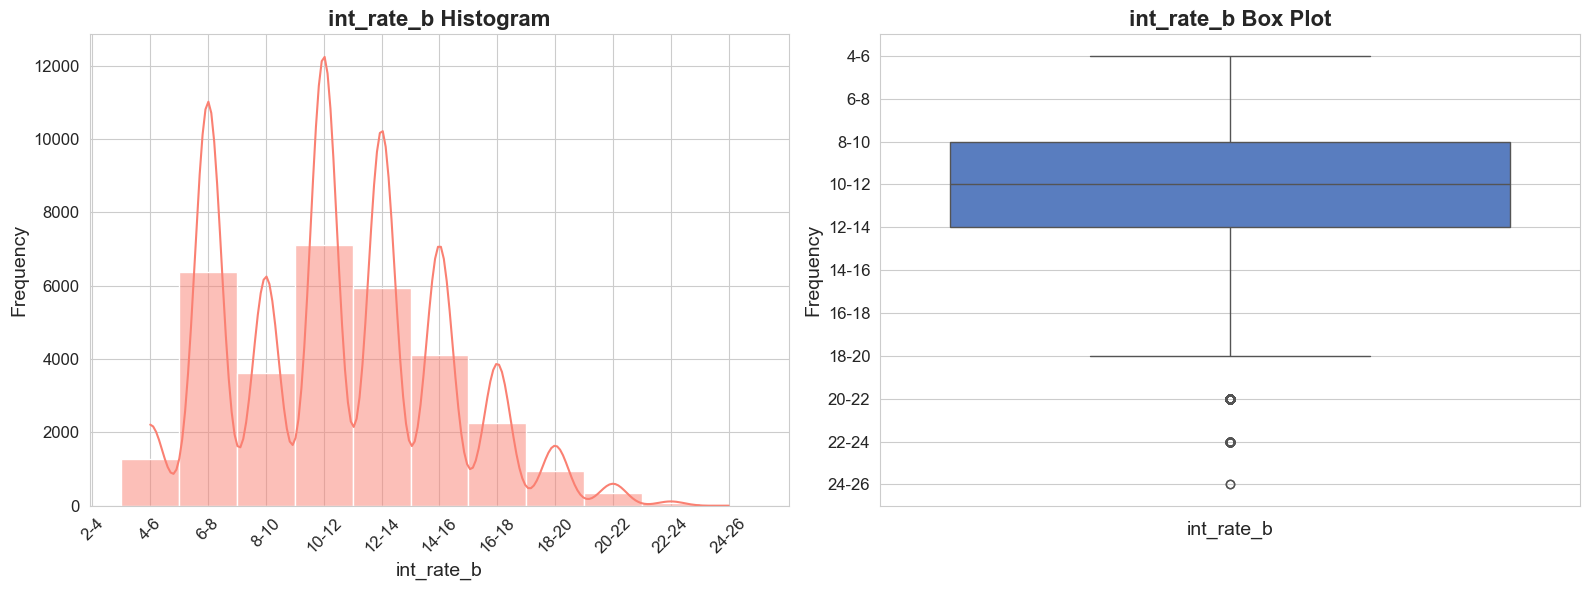

Initiating detailed analysis of int_rate_b...

Statistical summary for int_rate_b:
count      5459
unique       11
top       12-14
freq       1141
Name: int_rate_b, dtype: object

The mode of int_rate_b is: 12-14



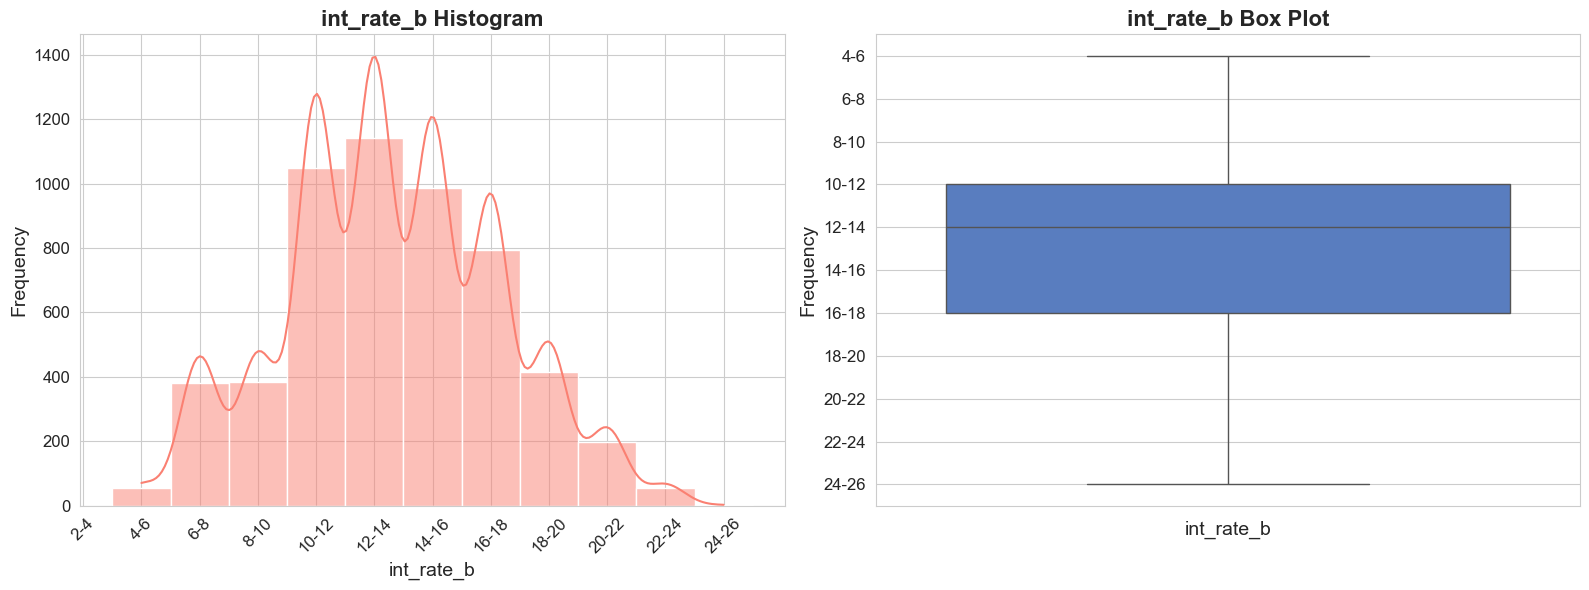

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count          32026
unique             7
top       5000-10000
freq           11046
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000



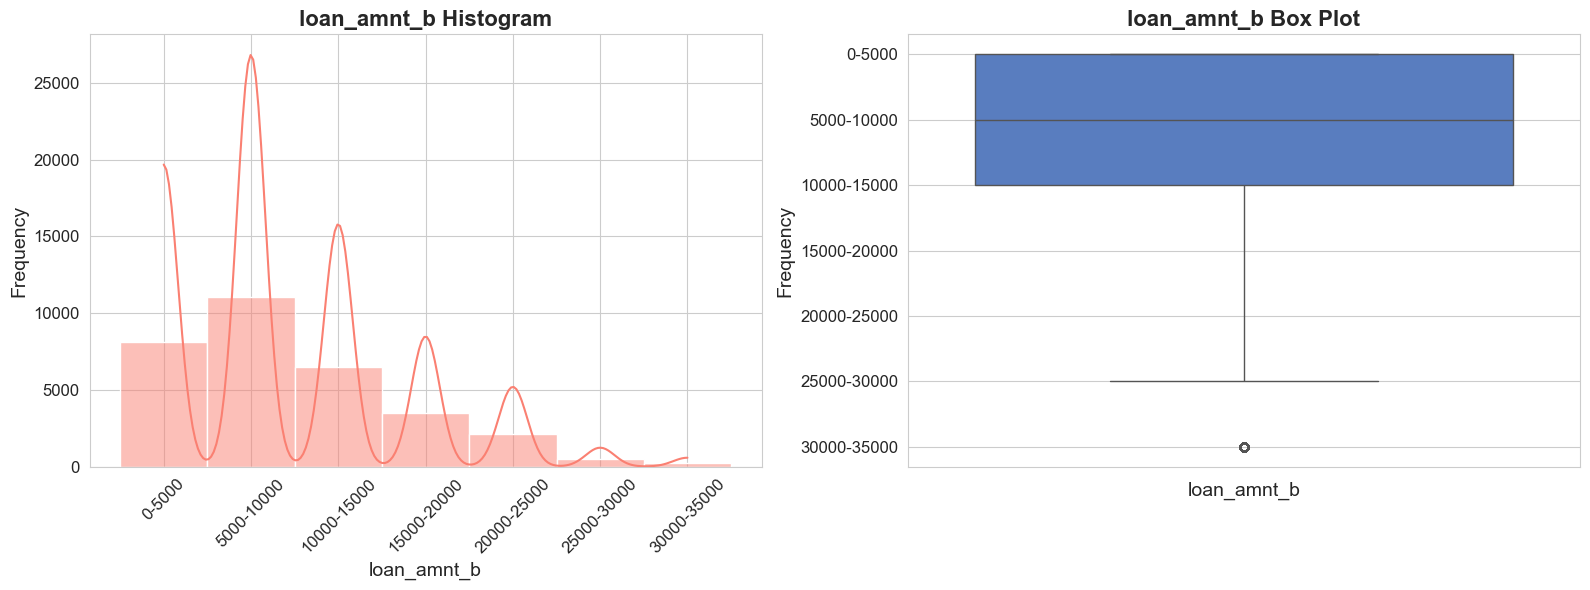

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count           5459
unique             7
top       5000-10000
freq            1631
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000



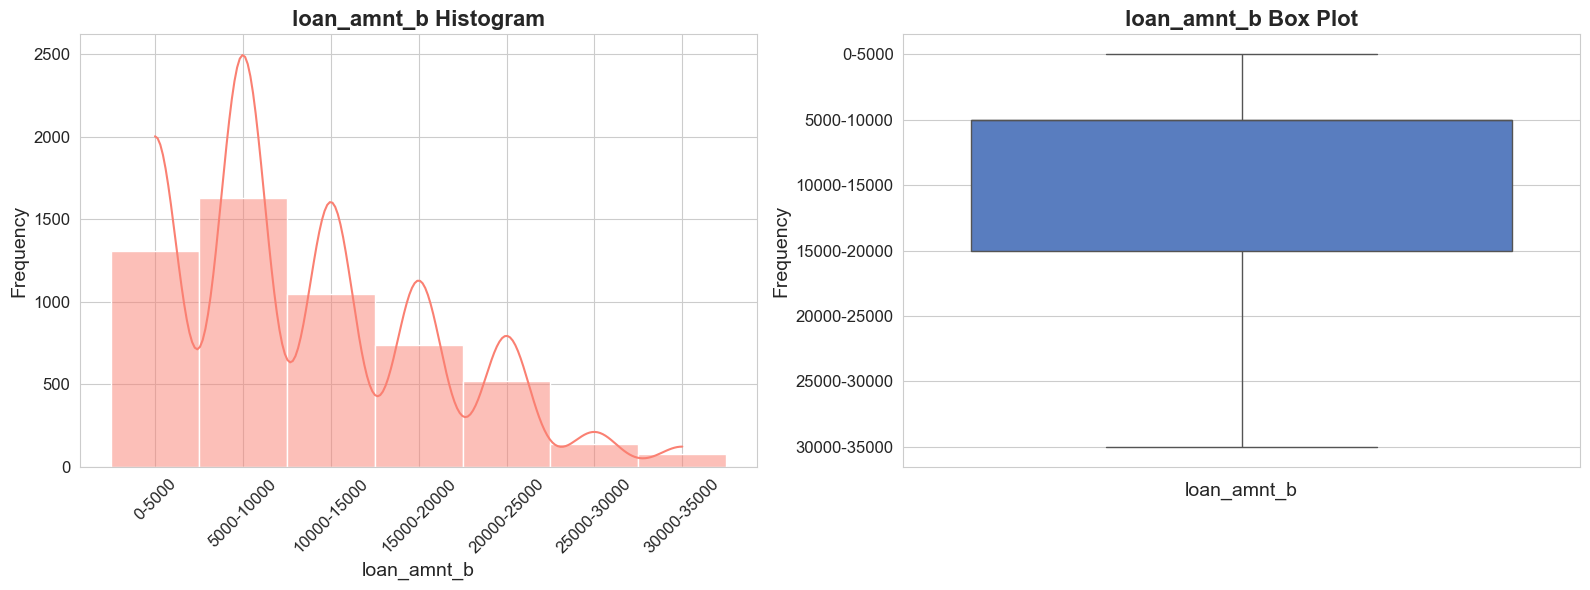

Initiating detailed analysis of grade...

Statistical summary for grade:
count     32026
unique        7
top           B
freq       9998
Name: grade, dtype: object

The mode of grade is: B



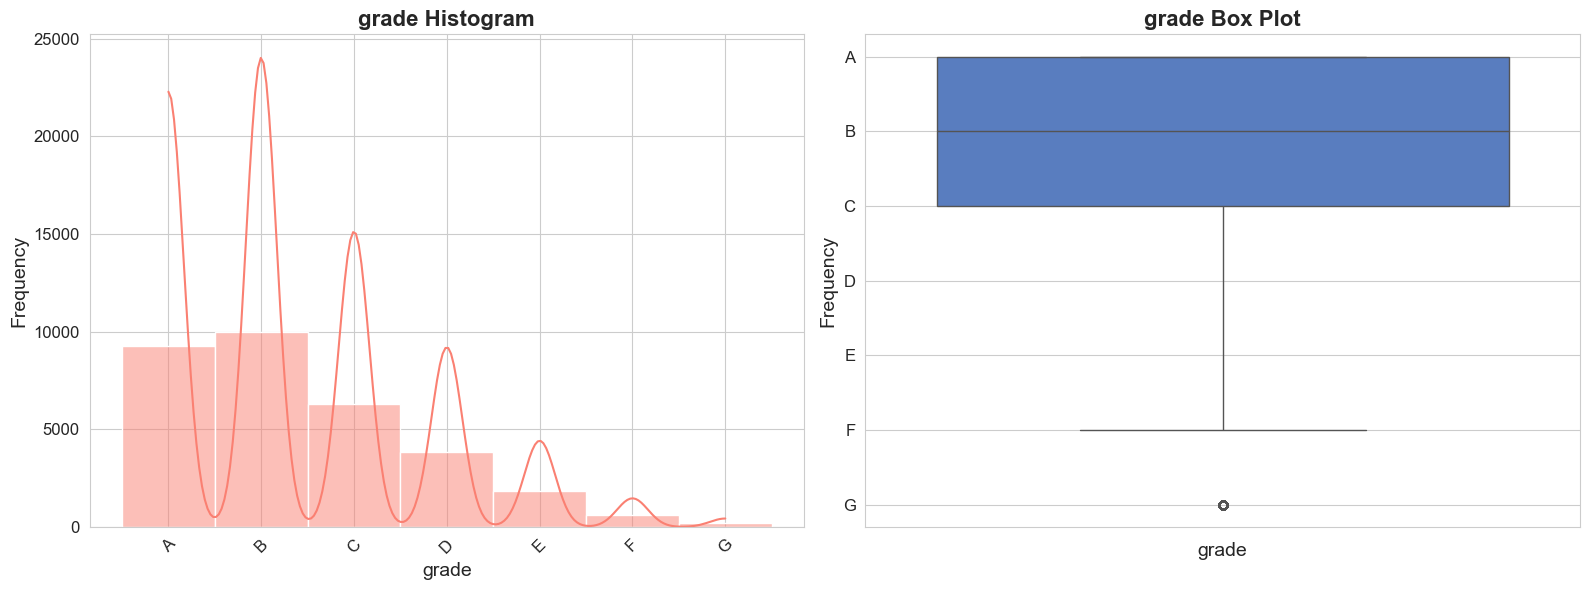

Initiating detailed analysis of grade...

Statistical summary for grade:
count     5459
unique       7
top          B
freq      1396
Name: grade, dtype: object

The mode of grade is: B



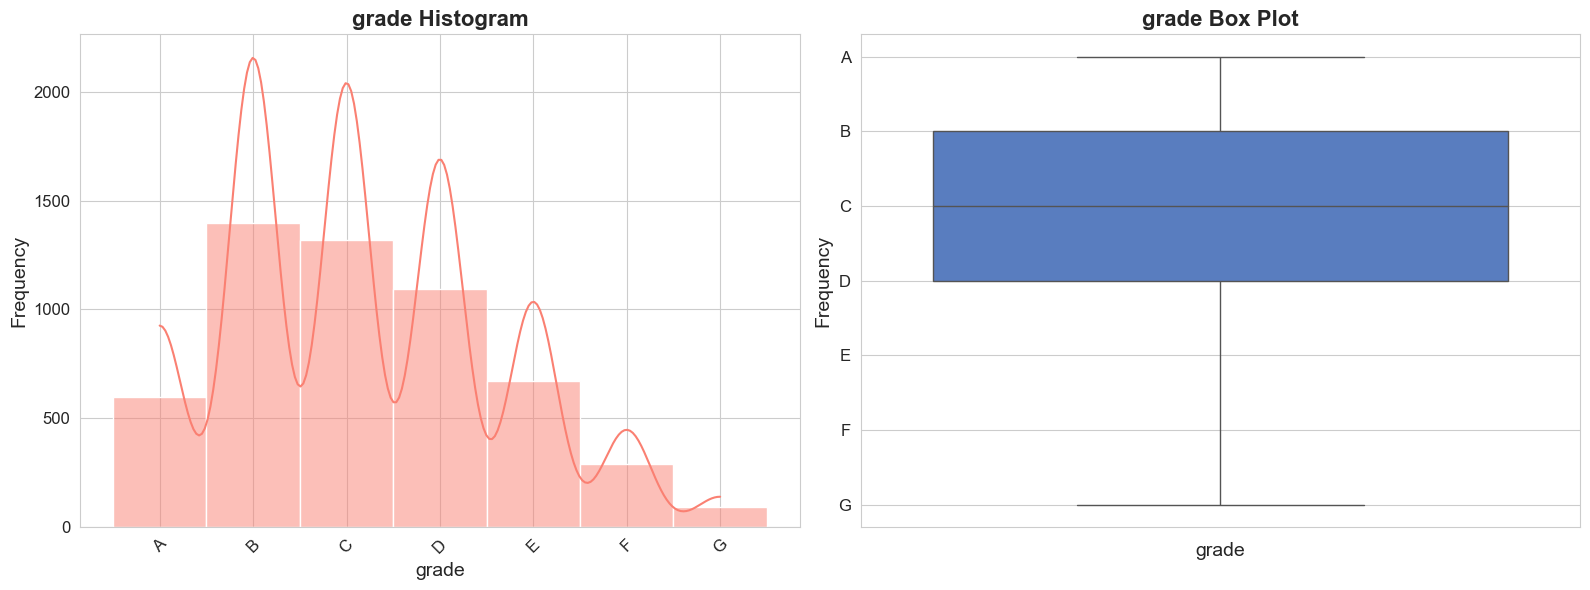

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     32026
unique       11
top         10 
freq       7644
Name: emp_length, dtype: object

The mode of emp_length is: 10 



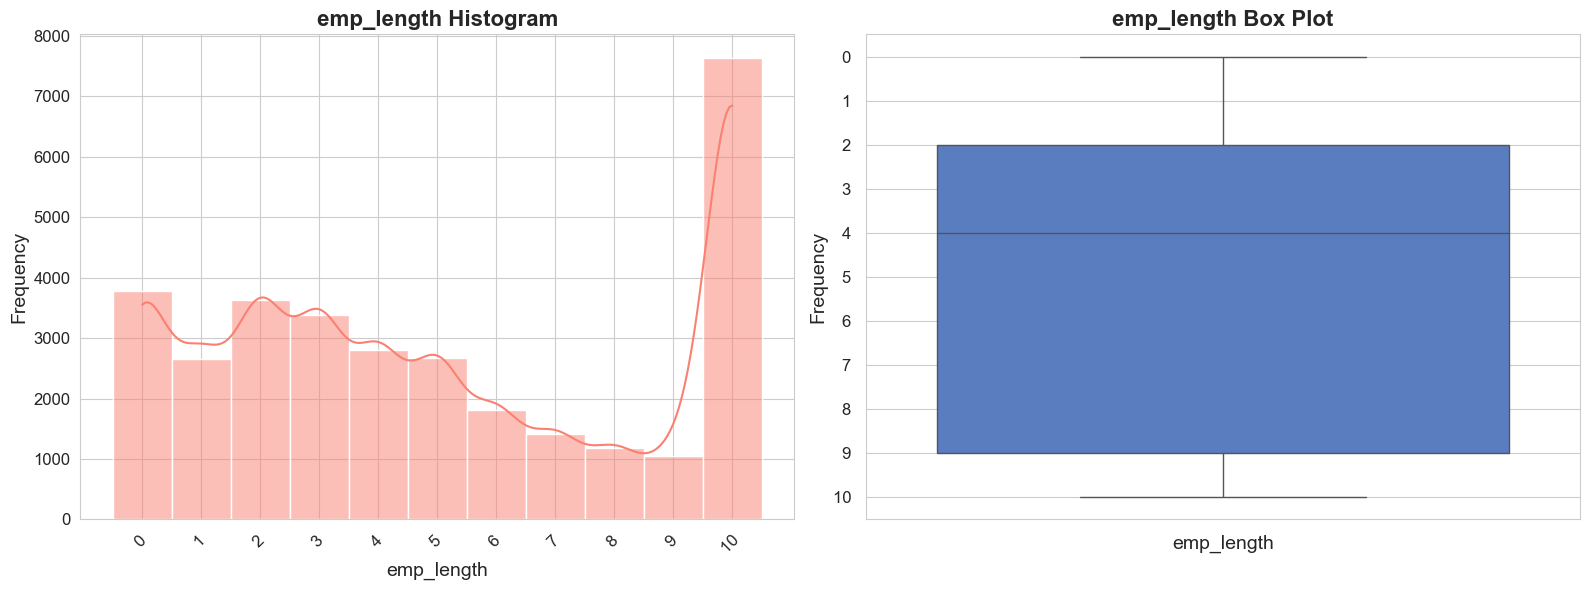

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     5459
unique      11
top        10 
freq      1487
Name: emp_length, dtype: object

The mode of emp_length is: 10 



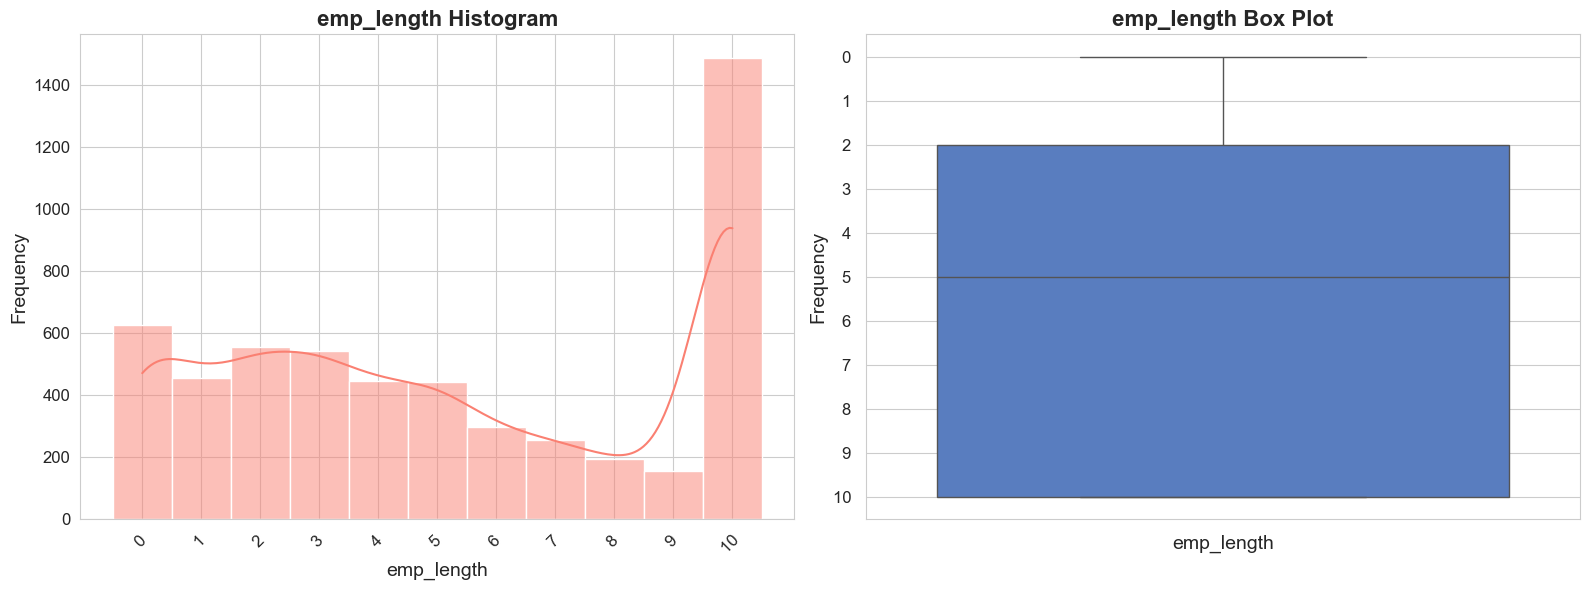

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count            32026
unique               3
top       Not Verified
freq             14407
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified



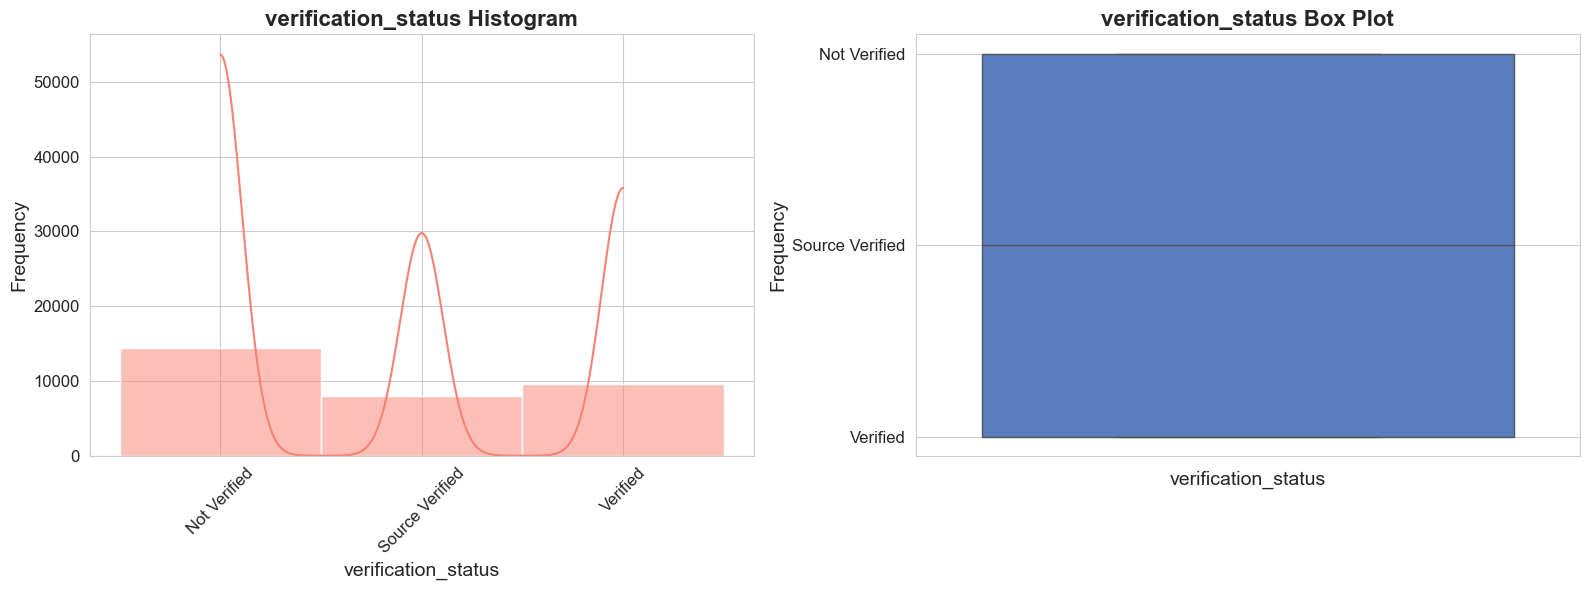

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count             5459
unique               3
top       Not Verified
freq              2121
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified



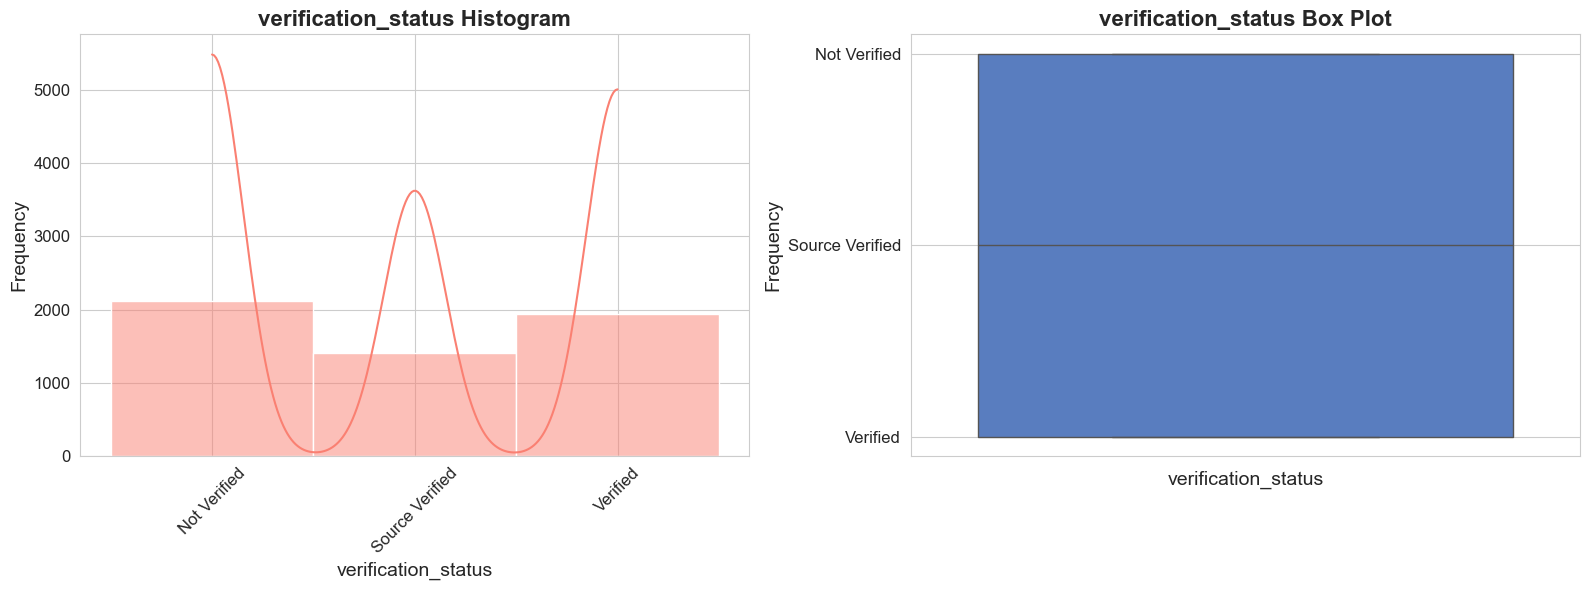

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     32026
unique        5
top        RENT
freq      15454
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT



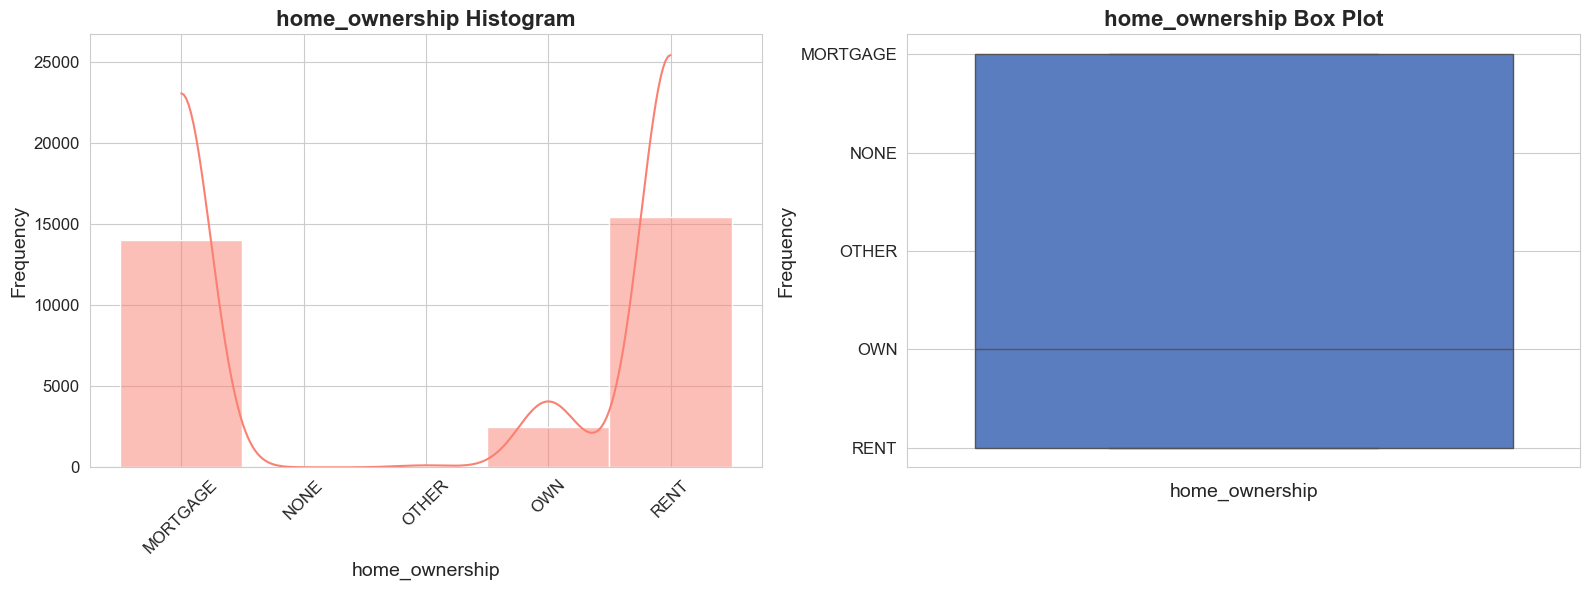

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     5459
unique       4
top       RENT
freq      2786
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT



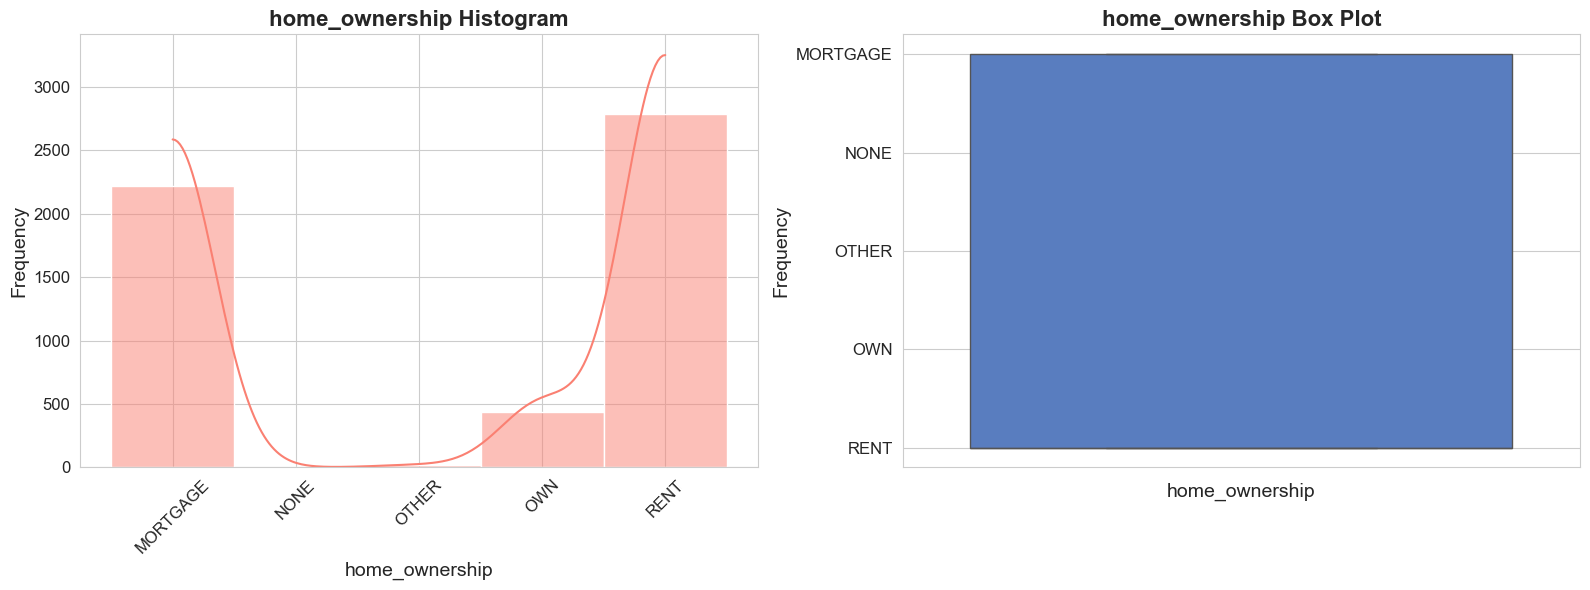

In [68]:
cat_columns = ['int_rate_b','loan_amnt_b', 'grade', 'emp_length','verification_status', 'home_ownership']
for category in cat_columns:
    univariate_analysis = UnivariateAnalysis(df_fully_paid, category)
    univariate_analysis.analyze_without_bins()
    univariate_analysis = UnivariateAnalysis(df_charged_off, category)
    univariate_analysis.analyze_without_bins()

### Observations

###### 1. **Interest Rate (int_rate)**: Loans which have interest rates between 10%-12% have a higher chance of loan status being fully paid off. However, loans having interest rates between 12%-14% show a higher likelihood of charge-off.
   
###### 2. **Annual Income (annual_inc)**: Loans Status fully paid when the customer's annual income is between 45K-60K. In contrast, the customers having an annual income between 30K-45K tend to have more charged-off loans.
   
###### 3. **Grade**: Borrowers with 10 or more years of employment have the highest count of  loans and also is the highest in fully paid and charged-off segments. This indicates that they take more loans and are also prone to default more.
   
###### 4. **Employment Length (emp_length)**: Borrowers having 10 or more years of employment have the highest loan counts in fully paid and default segments. This indicates they take more loans and also default more.
   
###### 5. **Verification Status**: Loans to borrowers who are not verified show higher peaks in being paid off compared to those who are verified. This indicates that unverified borrowers tend to repay their loans more frequently.
   
###### 6. **Home Ownership**: Renters have a higher default rate, which might be explained by their higher expenses towards rent.

## Bivariate Exploration

In [69]:
# A class for performing bivariate analysis on a DataFrame.

class BivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    # Generates a scatter plot for two specified columns in a DataFrame.
    def scatter_plot(self, x_column, y_column, marker_size=10, alpha=0.2, color='orange'):

        sns.set(style="whitegrid")
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=self.dataframe, x=x_column, y=y_column, s=marker_size, alpha=alpha, color=color)

        # Set plot title and labels
        plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13)
        plt.xlabel(x_column, fontsize=12)
        plt.ylabel(y_column, fontsize=12)

        plt.tight_layout()
        plt.show()

    # Generates a boxplot for a categorical column against a numerical column for bivariate analysis.
    def boxplot(self, categorical_column, numerical_column, palette='pastel'):

        sns.set(style="whitegrid")
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=self.dataframe, x=categorical_column, y=numerical_column, palette=palette)

        # Set plot title and labels
        plt.title(f'Boxplot: {categorical_column} vs {numerical_column}', fontsize=13)
        plt.xlabel(categorical_column, fontsize=12)
        plt.ylabel(numerical_column, fontsize=12)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Bivariate Analysis - Numerical vs Numerical

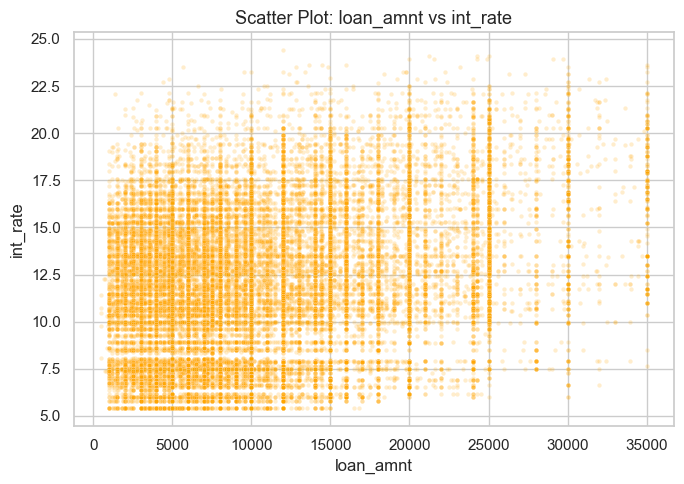

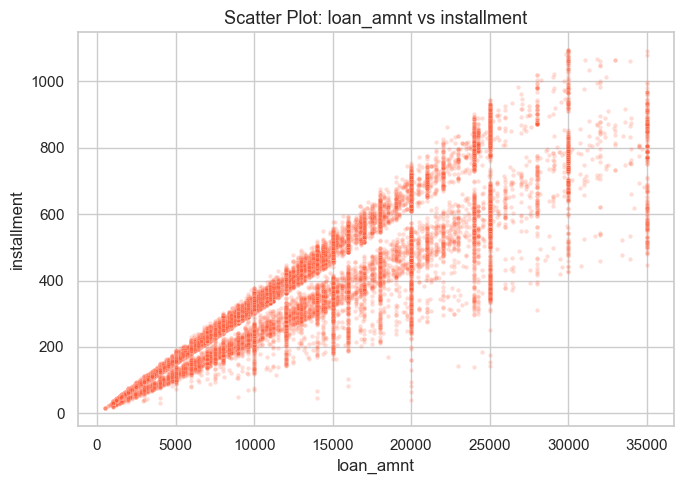

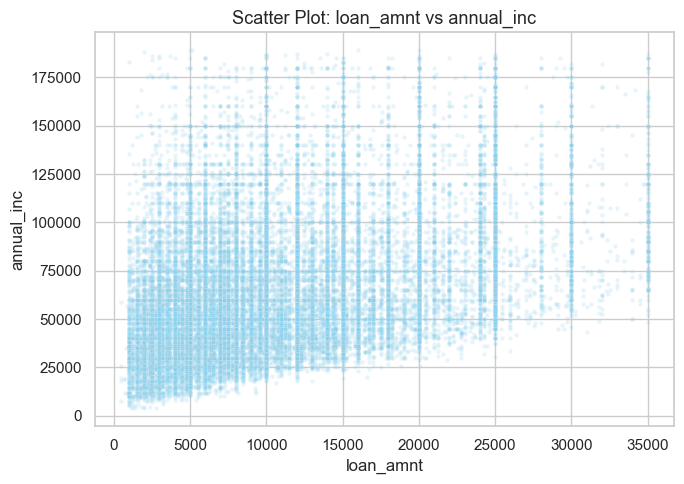

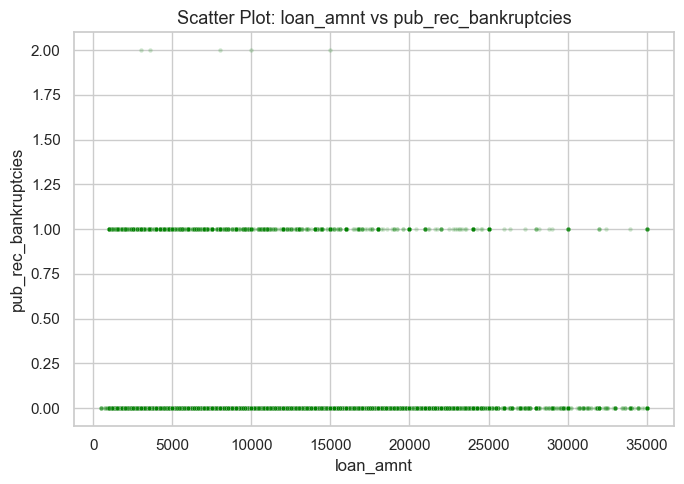

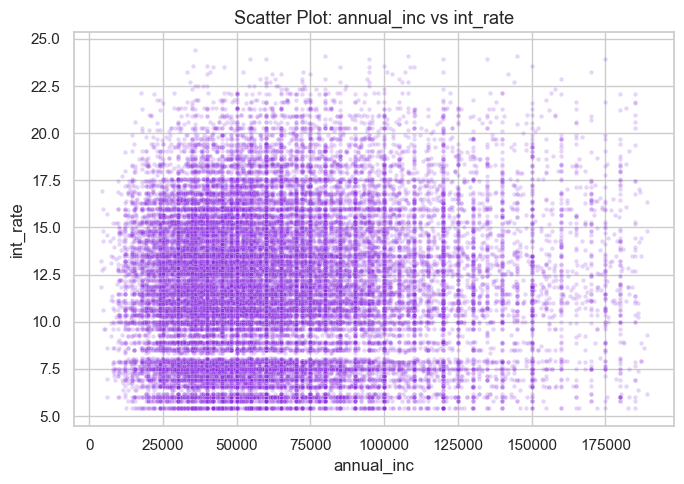

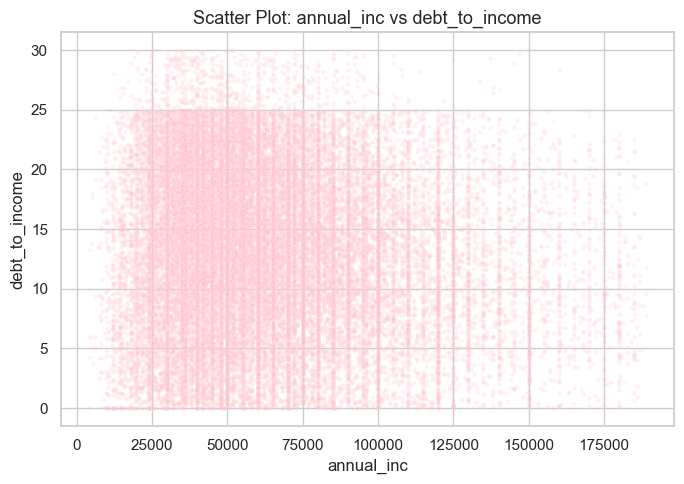

In [70]:
bivariate_analysis = BivariateAnalysis(df_clean)

bivariate_analysis.scatter_plot('loan_amnt', 'int_rate', color='orange')
bivariate_analysis.scatter_plot('loan_amnt', 'installment', color='#FF5733')
bivariate_analysis.scatter_plot('loan_amnt', 'annual_inc', color='skyblue')
bivariate_analysis.scatter_plot('loan_amnt', 'pub_rec_bankruptcies', color='green')
bivariate_analysis.scatter_plot('annual_inc', 'int_rate', color='#8A2BE2')
bivariate_analysis.scatter_plot('annual_inc', 'debt_to_income', color='pink')

## Observations : 

###### 1. **Loan Amount vs. Interest Rate**:
######    - Slight positive correlation: Higher loan amounts correlate with slightly lower interest rates.

###### 2. **Loan Amount vs. Installment**:
######    - Positive correlation: Larger loans entail higher installment payments.

###### 3. **Loan Amount vs. Annual Income**:
######    - Weak positive correlation: As annual income increases, loan amount tends to rise, albeit weakly.

###### 4. **Loan Amount vs. Public Record Bankruptcies**:
######    - Negative correlation: Public record bankruptcies minimally affect the loan amount qualification.

###### 5. **Annual Income vs. Interest Rate**:
######    - Weak negative correlation: Drawing conclusions from this scatter plot alone is challenging due to the weak correlation.

###### 6. **Annual Income vs. Debt-to-Income Ratio**:
######    - Negative correlation: As annual income increases, the debt-to-income ratio tends to decrease.

### Bivariate Analysis - Categorical vs Numerical

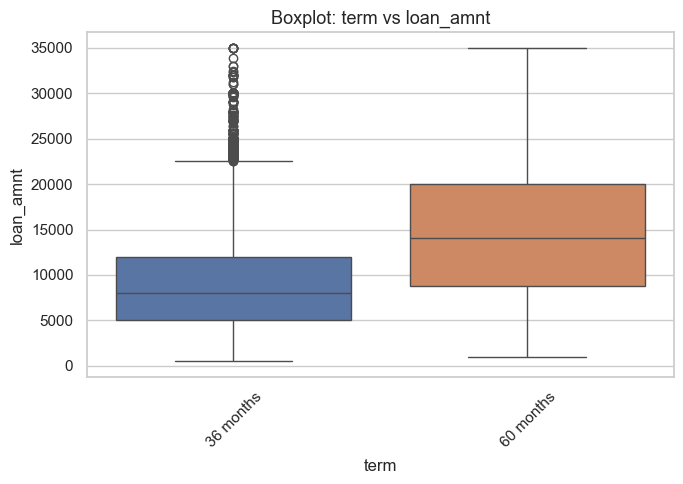

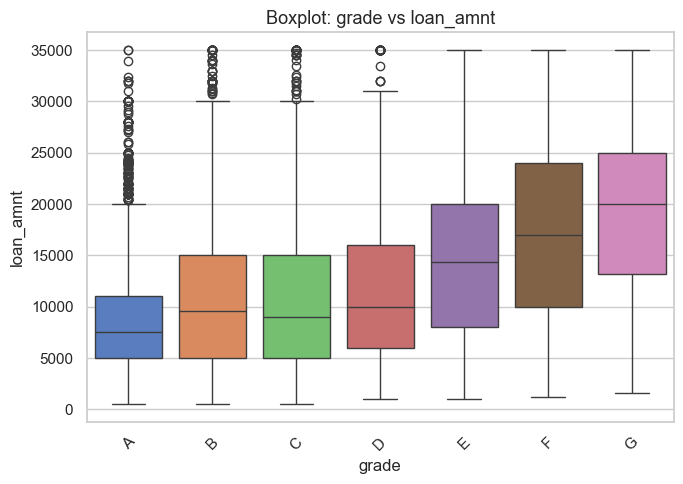

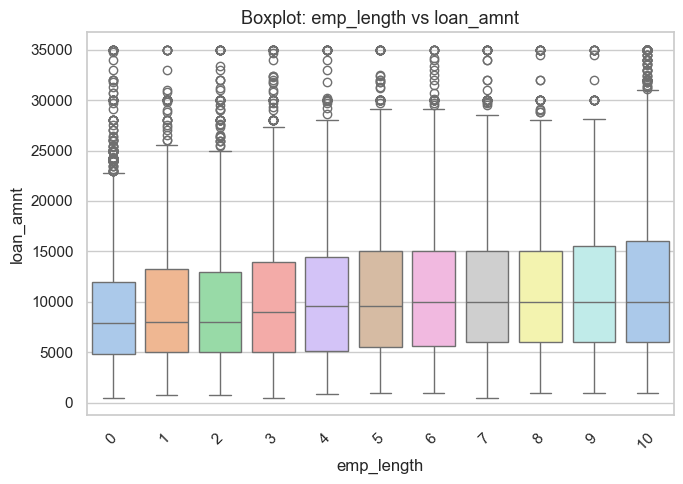

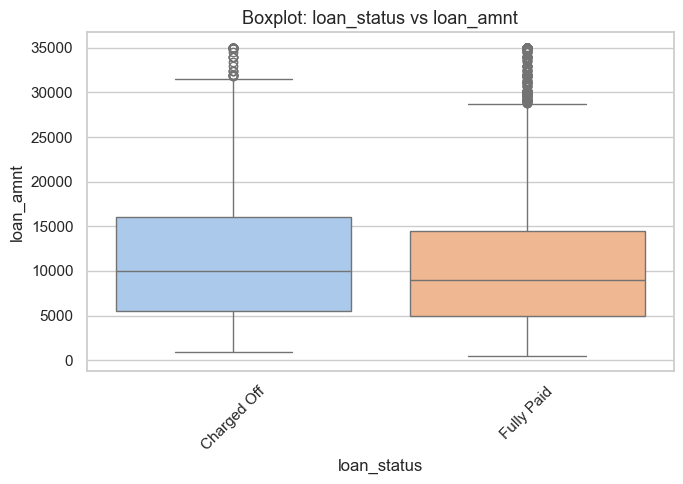

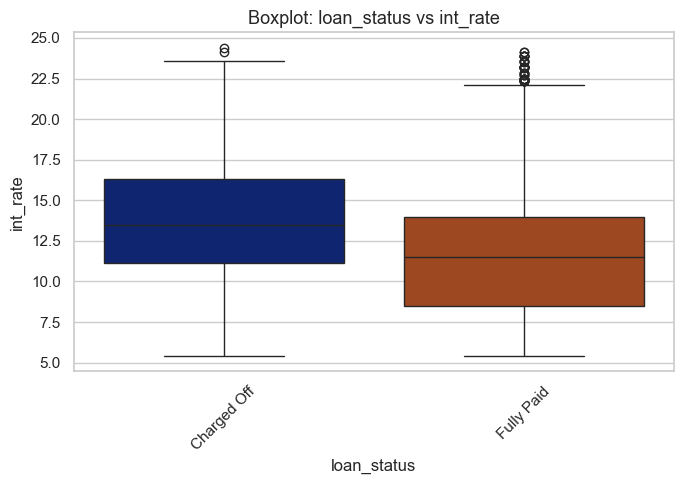

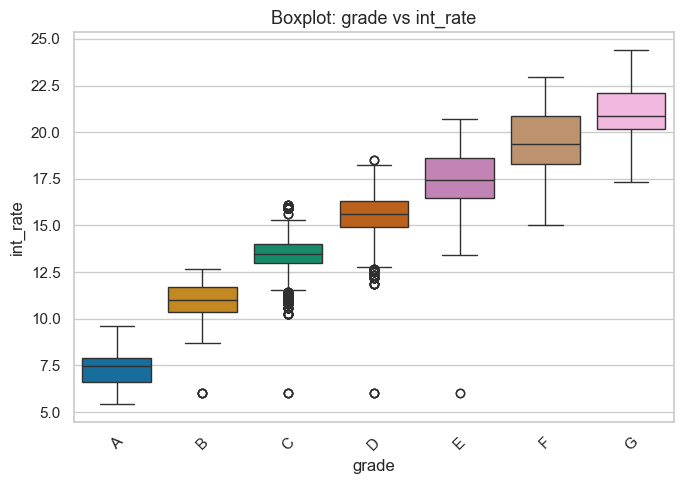

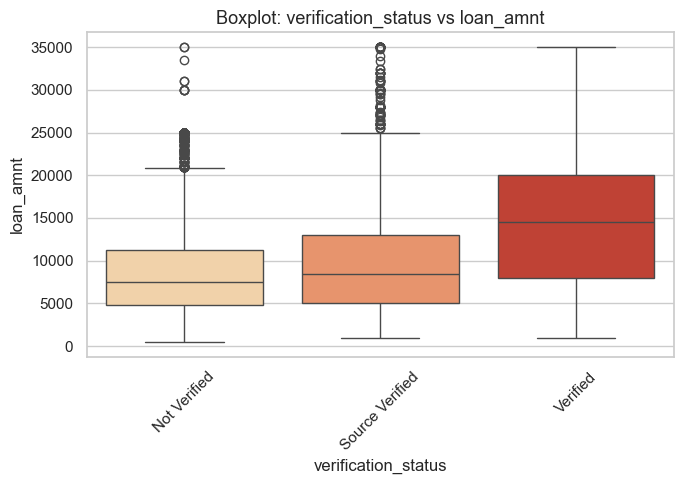

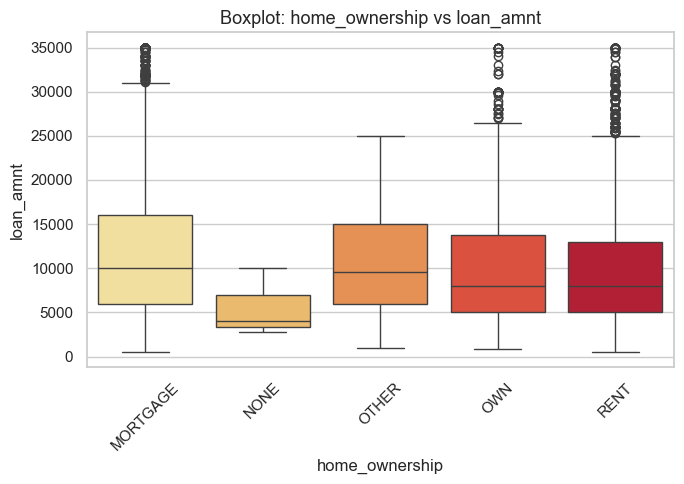

In [71]:
bivariate_analysis = BivariateAnalysis(df_clean)

bivariate_analysis.boxplot('term', 'loan_amnt', palette='deep')
bivariate_analysis.boxplot('grade', 'loan_amnt', palette='muted')
bivariate_analysis.boxplot('emp_length', 'loan_amnt', palette='pastel')
bivariate_analysis.boxplot('loan_status', 'loan_amnt', palette='pastel')
bivariate_analysis.boxplot('loan_status', 'int_rate', palette='dark')
bivariate_analysis.boxplot('grade', 'int_rate', palette='colorblind')
bivariate_analysis.boxplot('verification_status', 'loan_amnt', palette='OrRd')
bivariate_analysis.boxplot('home_ownership', 'loan_amnt', palette='YlOrRd')

## Observations:

###### 1. **Term vs Loan Amount**:

######     Loans with a 60-month term have higher average amounts  as compared to those with a 36-month term.

###### 2. **Grade vs Loan Amount**:

######     - Median of the loan amounts increases with higher grades (A to G), that indicates a very strong positive correlation.
######     - Grades C, D, and E exhibit wider variety in loan amounts when compared to other grades.

###### 4. **Employment Length vs. Loan Amount**:

######     There is no clear correlation between employment length and the loan amount. Variety in loan amounts differs across employment lengths.

###### 4. **Loan Status vs. Loan Amount**:

######     Median of the loan amounts is almost same for charged-off and fully paid loans, but charged-off loans exhibit greater variety.

###### 5. **Loan Status vs. Interest Rate**:

######     Charged-off loans have higher median interest rates than the fully paid loans, thereby suggesting a  potential correlation between interest rate and loan default.

###### 7. **Grade vs. Interest Rate**:

######     - Median of the interest rate increases with lower loan grades (A to G), indicating that riskier loans carry higher rates.
######     - Some grades (e.g., B, C, D, and E) show wider variety in interest rates.

###### 7. **Verification Status vs. Loan Amount**:

######     There is no much difference in median income of verified and unverified customers. Unverified applicants show wider variety in income.

###### 9. **Home Ownership vs. Loan Amount**:

######     Median of the loan amounts is high for customers with mortgages as compared to renters and others, suggesting a correlation between homeownership and the loan amount.

### Bivariate Analysis - Categorical vs Categorical

In [72]:
# Distribution of loan amounts across different categories of loan_status and other categorical variables

def analyze_categorical_relationships(df, categorical_columns, target_column, value_column):
    results = {}
  
    for category in categorical_columns:
        if category != target_column:
            category_count = df[category].value_counts().sort_index()
            pivot_table = df.pivot_table(index=target_column, columns=category, values=value_column, aggfunc='count')
            pivot_table = round(pivot_table/pivot_table.sum() *100 , 2)
            results[category] = pivot_table
            results[category+"_count"] = category_count
    return results

def plot_categorical_relationships(pivot_table, category, target_column, value_column):
    # Generate a custom color palette
    num_categories = pivot_table.shape[1]
    custom_palette = sns.color_palette("tab20", n_colors=num_categories)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_table.plot(kind='bar', stacked=True, color=custom_palette, ax=ax)
    ax.set_xlabel(target_column)
    ax.set_ylabel(value_column)
    ax.set_title(f"Distribution of {value_column} across {target_column} and {category}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Category: term



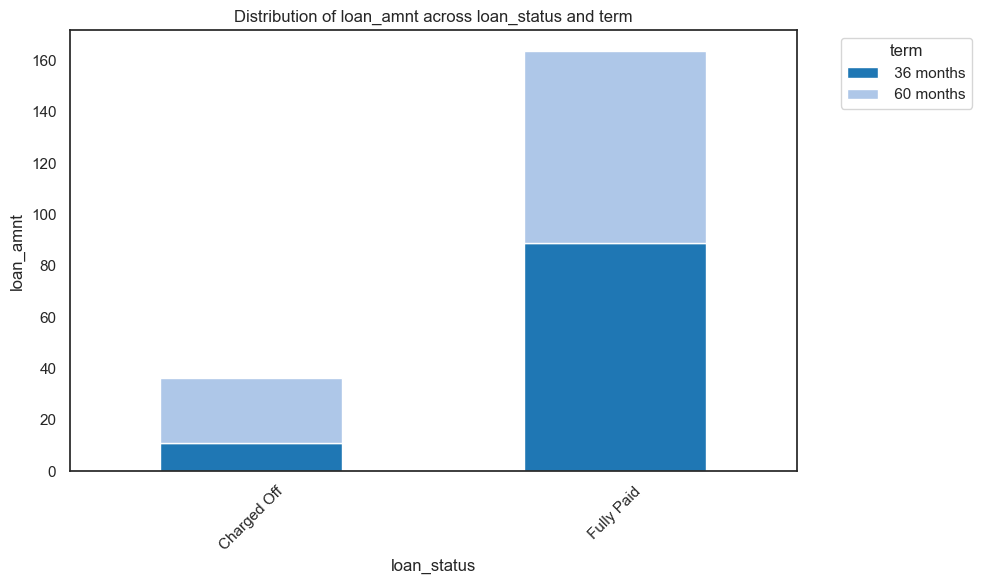


Category: loan_amnt_b



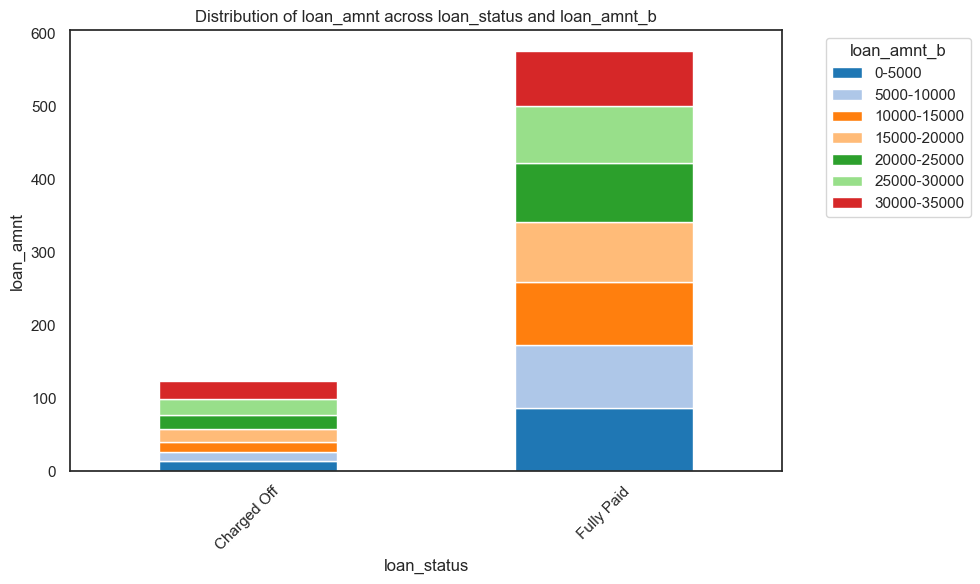


Category: int_rate_b



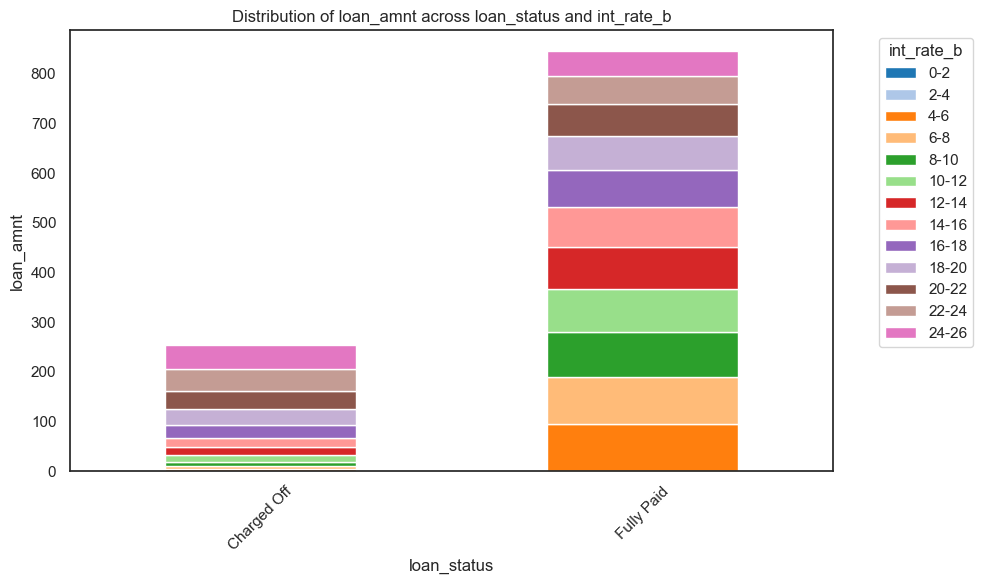


Category: grade



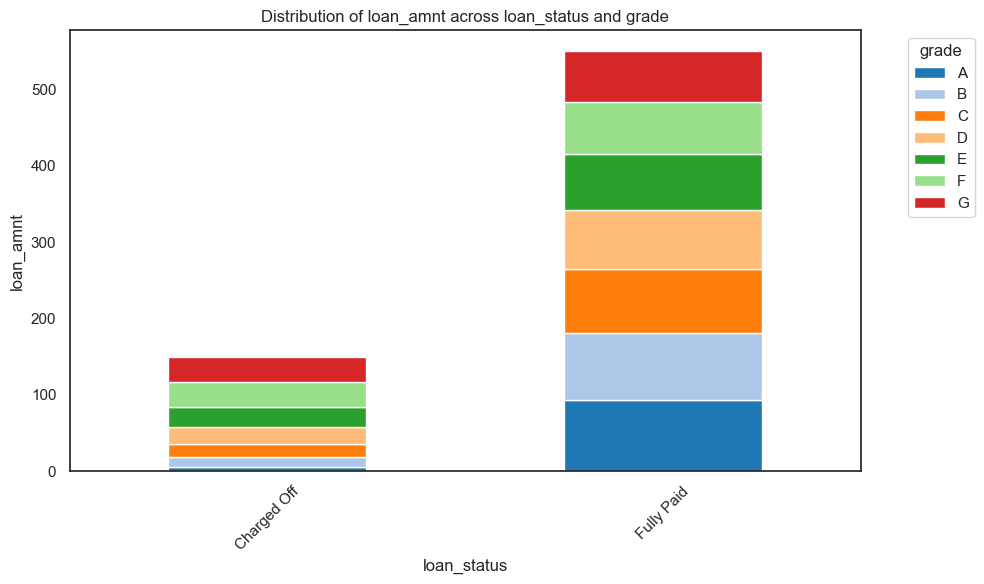


Category: home_ownership



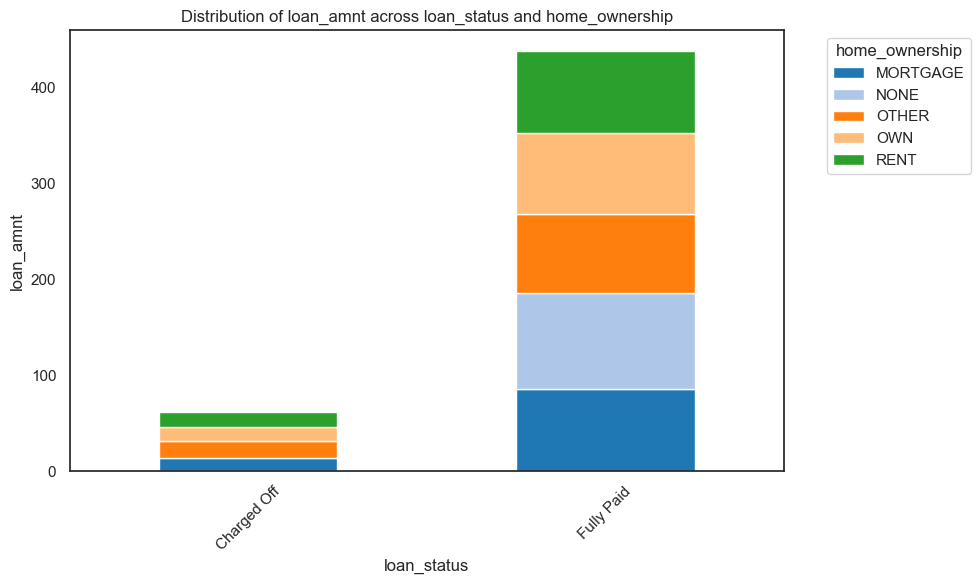


Category: purpose



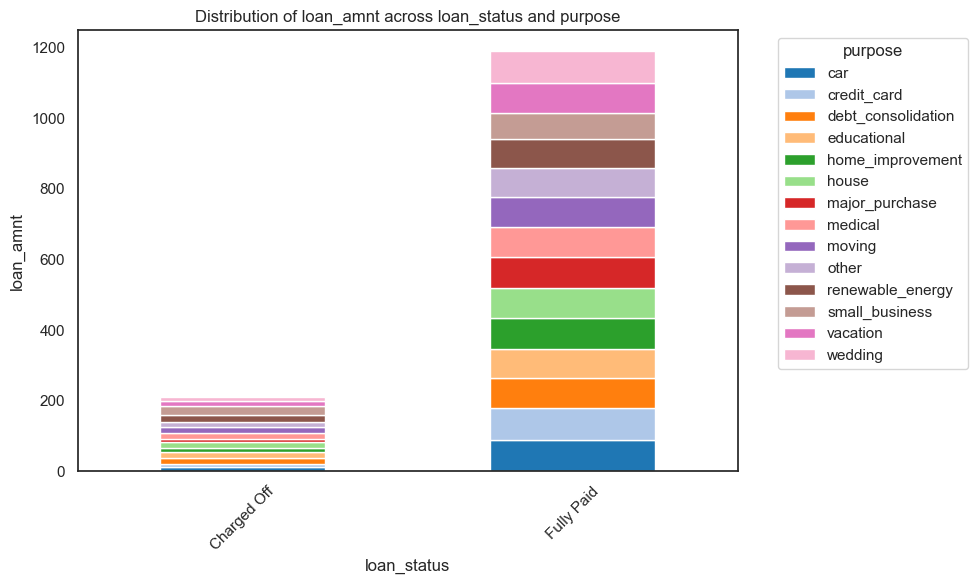

In [87]:
categorical_columns = ['term','loan_amnt_b','int_rate_b','grade', 'home_ownership', 'purpose']  # Replace with your categorical columns
target_column = 'loan_status'
value_column = 'loan_amnt'

result = analyze_categorical_relationships(df_clean, categorical_columns, target_column, value_column)

for category, table in result.items():
    if "_count" not in category:
        print(f"\nCategory: {category}\n")
        plot_categorical_relationships(table, category, target_column, value_column)
        display(HTML(table.reset_index().to_html()))

## Observations:

###### 1. **Comparison between Loan Status and Term**:

######     Risk Levels (Charged Off Rates):

- ###### Less Risky: 36 months (11.15%)
- ###### More Risky: 60 months (25.25%)

######     Distribution of Loan Terms:

- ###### More Common: 36-month loans
- ###### Less Common: 60-month loans

###### 2. **Comparison between Loan Status and Loan Amount**:

######     Risk Levels (Charged Off Rates):

- ###### Less Risky: 5000-10000 (12.87%), 0-5000 (13.91%), 10000-15000 (13.88%)
- ###### More Risky: 15000-20000 (17.43%), 20000-25000 (19.5%), 25000-30000 (21.31%)

######     Distribution of Loan Amounts:

- ###### More Prevalent: Loans in the 5000-10000 and 0-5000 ranges
- ###### Less Prevalent: Loans in the 25000-30000 and 20000-25000 ranges, indicating fewer larger loans.

###### 3. **Comparison between Loan Status and Interest Rate**:

######     Risk Levels (Charged Off Rates):

- ###### Less Risky: 4-6% (4.12%), 6-8% (5.65%), 8-10% (9.59%)
- ###### More Risky: 16-18% (26.11%), 18-20% (30.4%), 20-22% (36.26%), 22-24% (44.35%)

######     Distribution of Interest Rates:

- ###### More Common: Loans with 10-12% and 6-8% interest rates
- ###### Less Common: Loans with 22-24% and 20-22% interest rates, indicating fewer high-risk, high-interest loans.

###### 4. **Comparison between Loan Status and Grade**:

######     Risk Levels (Charged Off Rates):

- ###### Less Risky: Grade A (6.07%), B (12.25%), and C (17.35%)
- ###### More Risky: Grade D (22.22%), E (26.71%), F (32.11%), and G (33.21%)

######     Distribution of Loan Grades:

- ###### More Prevalent: Grades B and A
- ###### Less Prevalent: Grades F and G, indicating fewer high-risk loans.

###### 5. **Comparison between Loan Status and Home Ownership**:

######     Risk Levels (Charged Off Rates):

- ###### More Risky: OTHER (17.89%), RENT (15.27%), OWN (14.97%)
- ###### Less Risky: MORTGAGE (13.68%), NONE (0.0%)

######     Distribution of Home Ownership:

- ###### High Prevalence: RENT and MORTGAGE are most common.

###### 6. **Comparison between Loan Status and Purpose**:

######     Risk:

- ###### High Risk: Small business, renewable energy, educational loans.
- ###### Low Risk: Wedding, car, credit card, major purchase loans.

######     Demand:

- ###### High Demand: Debt consolidation, credit card loans.
- ###### Low Demand: Renewable energy, educational loans.

## Multivariate Analysis

In [74]:
# A class for performing multivariate analysis on a DataFrame.
class MultivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    # Generates a heatmap for visualizing the correlation matrix of numerical columns in the DataFrame. 
    def heatmap(self, cmap='coolwarm'):
        sns.set(style="white")
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.dataframe.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Correlation Matrix Heatmap', fontsize=16)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


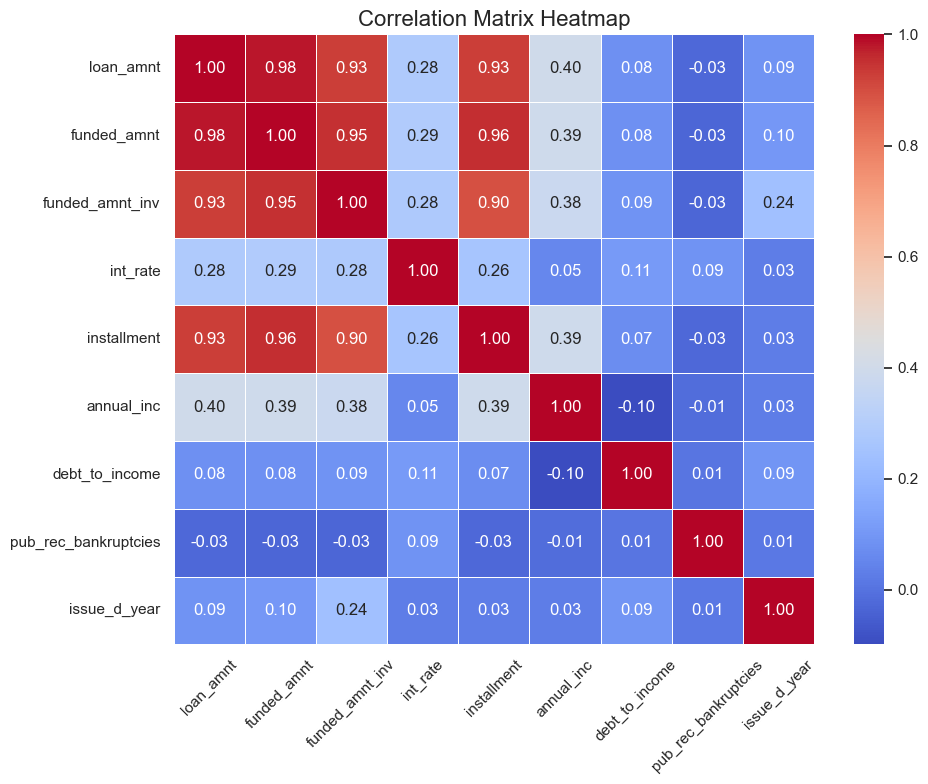

In [83]:
# Generating a heatmap to visualize the correlation matrix of numerical columns in the DataFrame
df_heatmap = df_clean[numerical_columns]
multivariate_analysis = MultivariateAnalysis(df_heatmap)
multivariate_analysis.heatmap()

## Observation:

###### 1. **Loan Amounts**:
- ###### Strong positive correlations with funded amount and funded amount invested, moderate correlation with installment, and weak correlation with borrower characteristics and interest rates.

###### 2. **Funded Amount**:
- ###### Strong positive correlations with loan amount and funded amount invested, moderate correlation with installment, and weak correlation with borrower characteristics and interest rates.

###### 3. **Funded Amount Invested**:
- ###### Strong positive correlations with loan amount and funded amount, moderate correlation with installment, and weak correlation with borrower characteristics and interest rates.

###### 4. **Interest Rate**:
- ###### Weak correlations with loan attributes, indicating some association but not particularly strong.

###### 5. **Installment**:
- ###### Strong positive correlations with loan amount, funded amount, and funded amount invested, weak correlation with borrower characteristics and interest rates.

###### 6. **Annual Income**:
- ###### Weak correlations with loan attributes, indicating a slight association with loan amounts but not particularly strong.

###### 7. **Debt-to-Income Ratio**:
- ###### Weak correlations with loan attributes, suggesting some association but not particularly strong.

###### 8. **Public Record Bankruptcies**:
- ###### Almost negligible correlation with loan attributes, indicating minimal association with borrower characteristics and loan terms.

###### 9. **Issue Date Year**:
- ###### Negligible correlation with loan attributes except for a somewhat stronger correlation with funded amount invested.

# Recommendations

###### Based on the above analysis, below are the factors that influence loan defaults:

- ###### **Loan Term**: Loans with longer terms (60 months) have higher default rates compared to shorter-term loans (36 months), indicating higher risk or borrower instability.

- ###### **Loan Amount**: For loan amounts exceeding $15,000, there is a trend of higher default rates. Borrowers may find it difficult to make repayments for larger loans, leading to increased charge-offs.

- ###### **Interest Rate**: Loans with higher interest rates, such as 16%, are associated with higher charge-off rates. High-interest loans may attract riskier customers.

- ###### **Loan Grade**: Lower-grade loans (D, E, F, G) have higher charge-off rates compared to higher-grade loans (A, B, C).

- ###### **Home Ownership**: Non-traditional home ownership, such as renting or other categories, is linked with higher charge-off rates compared to mortgage holders.

- ###### **Loan Purpose**: Loans for small businesses, renewable energy, and education exhibit higher charge-off rates, while loans for weddings, cars, credit cards, and major purchases have lower charge-off rates.

###### These factors provide insights into customer behavior that can help lenders understand and mitigate loan charge-off risks.

In [89]:
#!jupyter nbconvert Group_Facilitator_Name.ipynb --to slides --post serve --no-input --no-prompt
!jupyter nbconvert Group_Facilitator_Name.ipynb --to slides --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook Group_Facilitator_Name.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 61 image(s).
[NbConvertApp] Writing 5549446 bytes to Group_Facilitator_Name.slides.html
